# **New York City Yellow Taxi Data**

## Objective
In this case study you will be learning exploratory data analysis (EDA) with the help of a dataset on yellow taxi rides in New York City. This will enable you to understand why EDA is an important step in the process of data science and machine learning.

## **Problem Statement**
As an analyst at an upcoming taxi operation in NYC, you are tasked to use the 2023 taxi trip data to uncover insights that could help optimise taxi operations. The goal is to analyse patterns in the data that can inform strategic decisions to improve service efficiency, maximise revenue, and enhance passenger experience.

## Tasks
You need to perform the following steps for successfully completing this assignment:
1. Data Loading
2. Data Cleaning
3. Exploratory Analysis: Bivariate and Multivariate
4. Creating Visualisations to Support the Analysis
5. Deriving Insights and Stating Conclusions

---

**NOTE:** The marks given along with headings and sub-headings are cumulative marks for those particular headings/sub-headings.<br>

The actual marks for each task are specified within the tasks themselves.

For example, marks given with heading *2* or sub-heading *2.1* are the cumulative marks, for your reference only. <br>

The marks you will receive for completing tasks are given with the tasks.

Suppose the marks for two tasks are: 3 marks for 2.1.1 and 2 marks for 3.2.2, or
* 2.1.1 [3 marks]
* 3.2.2 [2 marks]

then, you will earn 3 marks for completing task 2.1.1 and 2 marks for completing task 3.2.2.


---

## Data Understanding
The yellow taxi trip records include fields capturing pick-up and drop-off dates/times, pick-up and drop-off locations, trip distances, itemized fares, rate types, payment types, and driver-reported passenger counts.

The data is stored in Parquet format (*.parquet*). The dataset is from 2009 to 2024. However, for this assignment, we will only be using the data from 2023.

The data for each month is present in a different parquet file. You will get twelve files for each of the months in 2023.

The data was collected and provided to the NYC Taxi and Limousine Commission (TLC) by technology providers like vendors and taxi hailing apps. <br>

You can find the link to the TLC trip records page here: https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page

###  Data Description
You can find the data description here: [Data Dictionary](https://www.nyc.gov/assets/tlc/downloads/pdf/data_dictionary_trip_records_yellow.pdf)

**Trip Records**



|Field Name       |description |
|:----------------|:-----------|
| VendorID | A code indicating the TPEP provider that provided the record. <br> 1= Creative Mobile Technologies, LLC; <br> 2= VeriFone Inc. |
| tpep_pickup_datetime | The date and time when the meter was engaged.  |
| tpep_dropoff_datetime | The date and time when the meter was disengaged.   |
| Passenger_count | The number of passengers in the vehicle. <br> This is a driver-entered value. |
| Trip_distance | The elapsed trip distance in miles reported by the taximeter. |
| PULocationID | TLC Taxi Zone in which the taximeter was engaged |
| DOLocationID | TLC Taxi Zone in which the taximeter was disengaged |
|RateCodeID |The final rate code in effect at the end of the trip.<br> 1 = Standard rate <br> 2 = JFK <br> 3 = Newark <br>4 = Nassau or Westchester <br>5 = Negotiated fare <br>6 = Group ride |
|Store_and_fwd_flag |This flag indicates whether the trip record was held in vehicle memory before sending to the vendor, aka “store and forward,” because the vehicle did not have a connection to the server.  <br>Y= store and forward trip <br>N= not a store and forward trip |
|Payment_type| A numeric code signifying how the passenger paid for the trip. <br> 1 = Credit card <br>2 = Cash <br>3 = No charge <br>4 = Dispute <br>5 = Unknown <br>6 = Voided trip |
|Fare_amount| The time-and-distance fare calculated by the meter. <br>Extra Miscellaneous extras and surcharges.  Currently, this only includes the 0.50 and 1 USD rush hour and overnight charges. |
|MTA_tax |0.50 USD MTA tax that is automatically triggered based on the metered rate in use. |
|Improvement_surcharge | 0.30 USD improvement surcharge assessed trips at the flag drop. The improvement surcharge began being levied in 2015. |
|Tip_amount |Tip amount – This field is automatically populated for credit card tips. Cash tips are not included. |
| Tolls_amount | Total amount of all tolls paid in trip.  |
| total_amount | The total amount charged to passengers. Does not include cash tips. |
|Congestion_Surcharge |Total amount collected in trip for NYS congestion surcharge. |
| Airport_fee | 1.25 USD for pick up only at LaGuardia and John F. Kennedy Airports|

Although the amounts of extra charges and taxes applied are specified in the data dictionary, you will see that some cases have different values of these charges in the actual data.

**Taxi Zones**

Each of the trip records contains a field corresponding to the location of the pickup or drop-off of the trip, populated by numbers ranging from 1-263.

These numbers correspond to taxi zones, which may be downloaded as a table or map/shapefile and matched to the trip records using a join.

This is covered in more detail in later sections.

---

## **1** Data Preparation

<font color = red>[5 marks]</font> <br>

### Import Libraries

In [15]:
# Import warnings

import warnings
warnings.simplefilter(action='ignore', category=DeprecationWarning)

In [16]:
# Import the libraries you will be using for analysis

import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [17]:
# Recommended versions
# numpy version: 1.26.4
# pandas version: 2.2.2
# matplotlib version: 3.10.0
# seaborn version: 0.13.2

# Check versions
print("numpy version:", np.__version__)
print("pandas version:", pd.__version__)
print("matplotlib version:", plt.matplotlib.__version__)
print("seaborn version:", sns.__version__)

numpy version: 1.26.4
pandas version: 2.2.2
matplotlib version: 3.10.0
seaborn version: 0.13.2


### **1.1** Load the dataset
<font color = red>[5 marks]</font> <br>

You will see twelve files, one for each month.

To read parquet files with Pandas, you have to follow a similar syntax as that for CSV files.

`df = pd.read_parquet('file.parquet')`

In [20]:
# Identify current working directory
print("Current Working Directory:", os.getcwd())

# Select the folder having data files
os.chdir(r'C:\Users\asaik\Desktop\Masters\7_EDAAssignment\assignment')

# Verify change in working directory
print("New Working Directory:", os.getcwd())

# Try loading one file
df = pd.read_parquet('trip_records/2023-1.parquet')

# Understanding the data contents for trip_records/2023-1.parquet file.
print(df.info())
print(df.head())
print(df.isnull().sum())
print(df.shape)
print(df.columns)

Current Working Directory: C:\Users\asaik\Desktop\Masters\7_EDAAssignment\assignment
New Working Directory: C:\Users\asaik\Desktop\Masters\7_EDAAssignment\assignment
<class 'pandas.core.frame.DataFrame'>
Index: 3041714 entries, 0 to 3066765
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64   

How many rows are there? Do you think handling such a large number of rows is computationally feasible when we have to combine the data for all twelve months into one?

To handle this, we need to sample a fraction of data from each of the files. How to go about that? Think of a way to select only some portion of the data from each month's file that accurately represents the trends.

#### Sampling the Data
> One way is to take a small percentage of entries for pickup in every hour of a date. So, for all the days in a month, we can iterate through the hours and select 5% values randomly from those. Use `tpep_pickup_datetime` for this. Separate date and hour from the datetime values and then for each date, select some fraction of trips for each of the 24 hours.

To sample data, you can use the `sample()` method. Follow this syntax:

```Python
# sampled_data is an empty DF to keep appending sampled data of each hour
# hour_data is the DF of entries for an hour 'X' on a date 'Y'

sample = hour_data.sample(frac = 0.05, random_state = 42)
# sample 0.05 of the hour_data
# random_state is just a seed for sampling, you can define it yourself

sampled_data = pd.concat([sampled_data, sample]) # adding data for this hour to the DF
```

This *sampled_data* will contain 5% values selected at random from each hour.

Note that the code given above is only the part that will be used for sampling and not the complete code required for sampling and combining the data files.

Keep in mind that you sample by date AND hour, not just hour. (Why?)

---

**1.1.1** <font color = red>[5 marks]</font> <br>
Figure out how to sample and combine the files.

**Note:** It is not mandatory to use the method specified above. While sampling, you only need to make sure that your sampled data represents the overall data of all the months accurately.

In [26]:
# Sample the data
# It is recommmended to not load all the files at once to avoid memory overload

In [27]:
# from google.colab import drive
# drive.mount('/content/drive')

In [28]:
# Take a small percentage of entries from each hour of every date.
# Iterating through the monthly data:
#   read a month file -> day -> hour: append sampled data -> move to next hour -> move to next day after 24 hours -> move to next month file
# Create a single dataframe for the year combining all the monthly data

# Select the folder having data files
import os

# Identify current working directory
print("Current Working Directory:", os.getcwd())

# Select the folder having data files
os.chdir('trip_records')

# Verify change in working directory
print("New Working Directory:", os.getcwd())

# Create a list of all the twelve files to read
file_list = os.listdir()

# initialise an empty dataframe
df = pd.DataFrame()


# iterate through the list of files and sample one by one:
for file_name in file_list:
    try:
        # file path for the current file
        file_path = os.path.join(os.getcwd(), file_name)

        # Reading the current file
        df_current = pd.read_parquet(file_path)

        # As specificed in the assignment, filtering records for year 2023
        df_current = df_current[df_current['tpep_pickup_datetime'].dt.year == 2023]

        # Extract date and hour from the datetime column
        df_current['tpep_pickup_datetime_date'] = df_current['tpep_pickup_datetime'].dt.date
        df_current['tpep_pickup_datetime_hour'] = df_current['tpep_pickup_datetime'].dt.hour

        # We will store the sampled data for the current date in this df by appending the sampled data from each hour to this
        # After completing iteration through each date, we will append this data to the final dataframe.
        sampled_data = pd.DataFrame()

        # Loop through dates and then loop through every hour of each date
        for date in df_current['tpep_pickup_datetime_date'].unique():
            df_day = df_current[df_current['tpep_pickup_datetime_date'] == date]
            # Iterate through each hour of the selected date
            for hour in df_day['tpep_pickup_datetime_hour'].unique():
                df_hour = df_day[df_day['tpep_pickup_datetime_hour'] == hour]
                # Sample 5% of the hourly data randomly
                if not df_hour.empty:
                    df_hour_sampled = df_hour.sample(frac=0.05, random_state=42)
                # add data of this hour to the dataframe
                sampled_data = pd.concat([sampled_data, df_hour_sampled])

        # Concatenate the sampled data of all the dates to a single dataframe
        df = pd.concat([df, sampled_data])

    except Exception as e:
        print(f"Error reading file {file_name}: {e}")

# Reset the index of the final concatenated dataframe
df.reset_index(drop=True, inplace=True)

# Understanding the data contents for complete sampled dataset.
print(df.info())
print(df.head())
print(df.isnull().sum())
print(df.shape)
print(df.columns)

Current Working Directory: C:\Users\asaik\Desktop\Masters\7_EDAAssignment\assignment
New Working Directory: C:\Users\asaik\Desktop\Masters\7_EDAAssignment\assignment\trip_records
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1896399 entries, 0 to 1896398
Data columns (total 22 columns):
 #   Column                     Dtype         
---  ------                     -----         
 0   VendorID                   int64         
 1   tpep_pickup_datetime       datetime64[us]
 2   tpep_dropoff_datetime      datetime64[us]
 3   passenger_count            float64       
 4   trip_distance              float64       
 5   RatecodeID                 float64       
 6   store_and_fwd_flag         object        
 7   PULocationID               int64         
 8   DOLocationID               int64         
 9   payment_type               int64         
 10  fare_amount                float64       
 11  extra                      float64       
 12  mta_tax                    float64       
 13

After combining the data files into one DataFrame, convert the new DataFrame to a CSV or parquet file and store it to use directly.

Ideally, you can try keeping the total entries to around 250,000 to 300,000.

In [30]:
# Store the df in csv/parquet
# converting to a .parquet file, as the data contents is very large.
df.to_parquet("../nyc_tlc_2023.parquet", index=False)

## **2** Data Cleaning
<font color = red>[30 marks]</font> <br>

Now we can load the new data directly.

In [33]:
# Identify current working directory
print("Current Working Directory:", os.getcwd())

# Select the folder having data files
os.chdir(r'C:\Users\asaik\Desktop\Masters\7_EDAAssignment\assignment')

# Verify change in working directory
print("New Working Directory:", os.getcwd())

# Load the new data file
df = pd.read_parquet('nyc_tlc_2023.parquet')

# Understanding the data contents
print(df.info())

Current Working Directory: C:\Users\asaik\Desktop\Masters\7_EDAAssignment\assignment\trip_records
New Working Directory: C:\Users\asaik\Desktop\Masters\7_EDAAssignment\assignment
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1896399 entries, 0 to 1896398
Data columns (total 22 columns):
 #   Column                     Dtype         
---  ------                     -----         
 0   VendorID                   int64         
 1   tpep_pickup_datetime       datetime64[us]
 2   tpep_dropoff_datetime      datetime64[us]
 3   passenger_count            float64       
 4   trip_distance              float64       
 5   RatecodeID                 float64       
 6   store_and_fwd_flag         object        
 7   PULocationID               int64         
 8   DOLocationID               int64         
 9   payment_type               int64         
 10  fare_amount                float64       
 11  extra                      float64       
 12  mta_tax                    float64       
 13

In [34]:
# Showcasing 1st 5 records
df.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-01-01 00:07:18   2023-01-01 00:23:15              1.0   
1         2  2023-01-01 00:16:41   2023-01-01 00:21:46              2.0   
2         2  2023-01-01 00:14:03   2023-01-01 00:24:36              3.0   
3         2  2023-01-01 00:24:30   2023-01-01 00:29:55              1.0   
4         2  2023-01-01 00:43:00   2023-01-01 01:01:00              NaN   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           7.74         1.0                  N           138           256   
1           1.24         1.0                  N           161           237   
2           1.44         1.0                  N           237           141   
3           0.54         1.0                  N           143           142   
4          19.24         NaN               None            66           107   

   payment_type  ...  mta_tax  tip_amount  tolls_amount  \
0             2  ...      0.5        0.00           0.0   
1             1  ...      0.5        2.58           0.0   
2             2  ...      0.5        0.00           0.0   
3             2  ...      0.5        0.00           0.0   
4             0  ...      0.5        5.93           0.0   

   improvement_surcharge  total_amount  congestion_surcharge  airport_fee  \
0                    1.0         41.15                   0.0         1.25   
1                    1.0         15.48                   2.5         0.00   
2                    1.0         16.40                   2.5         0.00   
3                    1.0         11.50                   2.5         0.00   
4                    1.0         35.57                   NaN          NaN   

   tpep_pickup_datetime_date  tpep_pickup_datetime_hour Airport_fee  
0                 2023-01-01                          0         NaN  
1                 2023-01-01                          0         NaN  
2                 2023-01-01                          0         NaN  
3                 2023-01-01                          0         NaN  
4                 2023-01-01                          0         NaN  

[5 rows x 22 columns]

In [35]:
# Understanding the data contents
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1896399 entries, 0 to 1896398
Data columns (total 22 columns):
 #   Column                     Dtype         
---  ------                     -----         
 0   VendorID                   int64         
 1   tpep_pickup_datetime       datetime64[us]
 2   tpep_dropoff_datetime      datetime64[us]
 3   passenger_count            float64       
 4   trip_distance              float64       
 5   RatecodeID                 float64       
 6   store_and_fwd_flag         object        
 7   PULocationID               int64         
 8   DOLocationID               int64         
 9   payment_type               int64         
 10  fare_amount                float64       
 11  extra                      float64       
 12  mta_tax                    float64       
 13  tip_amount                 float64       
 14  tolls_amount               float64       
 15  improvement_surcharge      float64       
 16  total_amount               float64  

#### **2.1** Fixing Columns
<font color = red>[10 marks]</font> <br>

Fix/drop any columns as you seem necessary in the below sections

**2.1.1** <font color = red>[2 marks]</font> <br>

Fix the index and drop unnecessary columns

In [38]:
# Understanding the data contents
print(f"\nCurrent shape : {df.shape}")

# Fix the index and drop any columns that are not needed

# Reset the index of the final updated dataframe
df.reset_index(drop=True, inplace=True)

# After going over the data dictionary, dropping columns having low impact & not very useful for analysis: store_and_fwd_flag
df.drop(columns=['store_and_fwd_flag'], inplace=True)

# dropping redundant columns derived from tpep_pickup_datetime_date as tpep_pickup_datetime already provides sufficent details
df.drop(columns=['tpep_pickup_datetime_date'], inplace=True)

# Although, there are few other columns which appear to have low impact, 
# we are not manipulating any other columns, as those columns have usage in data analysis later.

# Reset the index of the final updated dataframe
df.reset_index(drop=True, inplace=True)

# Understanding the data contents
print(f"\nUpdated shape : {df.shape}")


Current shape : (1896399, 22)

Updated shape : (1896399, 20)


**2.1.2** <font color = red>[3 marks]</font> <br>
There are two airport fee columns. This is possibly an error in naming columns. Let's see whether these can be combined into a single column.

In [40]:
# Understanding the data contents
print(f"\nCurrent shape : {df.shape}")
print(f"\nCurrent columns : {df.columns}")

# Combine the two airport fee columns
df['airport_fee_merged'] = df['airport_fee'].combine_first(df['Airport_fee'])

# Drop old columns
df.drop(columns=['airport_fee', 'Airport_fee'], inplace=True)

# Rename for consistency
df.rename(columns={'airport_fee_merged': 'airport_fee'}, inplace=True)

# Understanding the data contents
print(f"\nUpdated shape : {df.shape}")
print(f"\nUpdated columns : {df.columns}")


Current shape : (1896399, 20)

Current columns : Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'PULocationID',
       'DOLocationID', 'payment_type', 'fare_amount', 'extra', 'mta_tax',
       'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount',
       'congestion_surcharge', 'airport_fee', 'tpep_pickup_datetime_hour',
       'Airport_fee'],
      dtype='object')

Updated shape : (1896399, 19)

Updated columns : Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'PULocationID',
       'DOLocationID', 'payment_type', 'fare_amount', 'extra', 'mta_tax',
       'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount',
       'congestion_surcharge', 'tpep_pickup_datetime_hour', 'airport_fee'],
      dtype='object')


**2.1.3** <font color = red>[5 marks]</font> <br>
Fix columns with negative (monetary) values

In [42]:
# check where values of fare amount are negative
negative_fare_df = df[df['fare_amount'] < 0]

print(f"\nThere are {negative_fare_df.shape[0]} negative values `Fare Amount` column in the sample dataset")


There are 0 negative values `Fare Amount` column in the sample dataset


Did you notice something different in the `RatecodeID` column for above records?

In [44]:
# Analyse RatecodeID for the negative fare amounts
ratecode_negative_fare_counts = negative_fare_df['RatecodeID'].value_counts()
print("\nRatecodeID distribution for negative fares:\n", ratecode_negative_fare_counts)

# Analysing `RatecodeID` column: as per, Data Dictionary – Yellow Taxi Trip Records
    # RateCodeID The final rate code in effect at the end of the trip.
        # 1= Standard rate
        # 2=JFK
        # 3=Newark
        # 4=Nassau or Westchester
        # 5=Negotiated fare
        # 6=Group ride

print(df['RatecodeID'].value_counts(dropna=False))
#  `RatecodeID` code 99.0 is likely a data entry error and such records can be imputed later
#  `RatecodeID` contains alot of missing values


RatecodeID distribution for negative fares:
 Series([], Name: count, dtype: int64)
RatecodeID
1.0     1729258
2.0       71670
NaN       64874
99.0      10472
5.0       10275
3.0        6124
4.0        3723
6.0           3
Name: count, dtype: int64


In [45]:
# Find which columns have negative values

# Listing all numerical columns available
numerical_columns = [col for col in df.columns if df[col].dtype in ['int64', 'float64']]
print(f"\nAll numerical columns: \n{numerical_columns}")

# Filtering numerical columns which contains negative values
print("\nColumns containign negative values :")
negative_numerical_columns = []
for column in numerical_columns:
    negative_values = df[df[column] < 0][column].unique()
    if negative_values.size > 0:
        negative_numerical_columns.append(column)
        print(f"\nNegative values in {column}: {negative_values}")


All numerical columns: 
['VendorID', 'passenger_count', 'trip_distance', 'RatecodeID', 'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount', 'congestion_surcharge', 'airport_fee']

Columns containign negative values :

Negative values in extra: [-1.  -2.5]

Negative values in mta_tax: [-0.5]

Negative values in improvement_surcharge: [-1.]

Negative values in total_amount: [-1.   -5.25 -4.   -1.5  -5.   -3.25 -2.75 -5.75 -3.5 ]

Negative values in congestion_surcharge: [-2.5]

Negative values in airport_fee: [-1.25 -1.75]


In [46]:
# fix these negative values

#There are multiple approaches to fix negative values:
    # 1. Convert to Absolute Values
    # 2. Replace Negative Values with Zero
    # 3. Impute Negative Values with Mean/Median
    # 4. Remove Rows with Negative Values

# PREFERRED CHOICE : 1. Convert to Absolute Values
# Reasoning : 
    # Columns containing amounts cannot have negative values, should most likely be the result of input errors, converting to absolute values
    # Further, any large and inconsistent values can be further cleaned during outlier processing.

df[negative_numerical_columns] = df[negative_numerical_columns].abs()

# Filtering numerical columns which contains negative values
print("\nColumns containign negative values :\n")
negative_numerical_columns = []
for column in numerical_columns:
    negative_values = df[df[column] < 0][column].unique()
    if negative_values.size > 0:
        negative_numerical_columns.append(column)
        print(f"\nNegative values in {column}: {negative_values}")


Columns containign negative values :



### **2.2** Handling Missing Values
<font color = red>[10 marks]</font> <br>

**2.2.1**  <font color = red>[2 marks]</font> <br>
Find the proportion of missing values in each column




In [49]:
# Find the proportion of missing values in each column

missing_data = df.isnull().sum().to_frame(name="Missing Count")
missing_data["Missing Percentage"] = round((missing_data["Missing Count"] / len(df)) * 100, 2)

print("\nMissing Values Summary:\n")
print(missing_data.sort_values(by="Missing Percentage", ascending=False))


Missing Values Summary:

                           Missing Count  Missing Percentage
airport_fee                        64874                3.42
passenger_count                    64874                3.42
congestion_surcharge               64874                3.42
RatecodeID                         64874                3.42
mta_tax                                0                0.00
tpep_pickup_datetime_hour              0                0.00
total_amount                           0                0.00
improvement_surcharge                  0                0.00
tolls_amount                           0                0.00
tip_amount                             0                0.00
VendorID                               0                0.00
extra                                  0                0.00
tpep_pickup_datetime                   0                0.00
payment_type                           0                0.00
DOLocationID                           0                0.0

**2.2.2**  <font color = red>[3 marks]</font> <br>
Handling missing values in `passenger_count`

In [51]:
# Display the rows with null values
# Impute NaN values in 'passenger_count'

empty_count = df['passenger_count'].isnull().sum()
print(f"\nCurrent missing values in Passenger Count : {empty_count}")

zero_count = (df['passenger_count'] == 0).sum()
print(f"\nNumber of trips with zero passengers: {zero_count}")

print(f"\nCurrent value distribution for column :\n {df['passenger_count'].value_counts(dropna=False)}")

# As passenger_count column is a discrete numerical column, imputation with mode value is preferred
mode_value = df['passenger_count'].mode()[0]
print(f"\nMode value fo passenger_count: {mode_value}")
df['passenger_count'] = df['passenger_count'].fillna(mode_value)
df['passenger_count'] = df['passenger_count'].replace(0, mode_value)

print(f"\nUpdated value distribution for column :\n {df['passenger_count'].value_counts(dropna=False)}")


Current missing values in Passenger Count : 64874

Number of trips with zero passengers: 29681

Current value distribution for column :
 passenger_count
1.0    1377223
2.0     277298
3.0      69034
NaN      64874
4.0      38537
0.0      29681
5.0      23871
6.0      15860
8.0         11
7.0          5
9.0          5
Name: count, dtype: int64

Mode value fo passenger_count: 1.0

Updated value distribution for column :
 passenger_count
1.0    1471778
2.0     277298
3.0      69034
4.0      38537
5.0      23871
6.0      15860
8.0         11
7.0          5
9.0          5
Name: count, dtype: int64


Did you find zeroes in passenger_count? Handle these.

YES - Zeros values were available - As passenger_count column is a discrete numerical column, imputation with mode value is preferred.

**2.2.3**  <font color = red>[2 marks]</font> <br>
Handle missing values in `RatecodeID`

In [54]:
# Fix missing values in 'RatecodeID'

# Display the rows with null values
# Impute NaN values in 'passenger_count'

empty_count = df['RatecodeID'].isnull().sum()
print(f"\nCurrent missing values in RatecodeID : {empty_count}")


print(f"\nCurrent value distribution for column :\n {df['RatecodeID'].value_counts(dropna=False)}")

# As RatecodeID column is a discrete numerical column, imputation with mode value is preferred
mode_value = df['RatecodeID'].mode()[0]
print(f"\nMode value fo passenger_count: {mode_value}")

df['RatecodeID'] = df['RatecodeID'].fillna(mode_value)

print(f"\nUpdated value distribution for column :\n {df['RatecodeID'].value_counts(dropna=False)}")

# Analysing `RatecodeID` column: as per, Data Dictionary – Yellow Taxi Trip Records
    # RateCodeID The final rate code in effect at the end of the trip.
        # 1=Standard rate
        # 2=JFK
        # 3=Newark
        # 4=Nassau or Westchester
        # 5=Negotiated fare
        # 6=Group ride

#  `RatecodeID` code 99.0 is likely a data entry error and such records can be removed as part of outlier processing
_99_count = (df['RatecodeID'] == 99).sum()
print(f"\nNumber of trips with 99 RatecodeID: {_99_count}")


Current missing values in RatecodeID : 64874

Current value distribution for column :
 RatecodeID
1.0     1729258
2.0       71670
NaN       64874
99.0      10472
5.0       10275
3.0        6124
4.0        3723
6.0           3
Name: count, dtype: int64

Mode value fo passenger_count: 1.0

Updated value distribution for column :
 RatecodeID
1.0     1794132
2.0       71670
99.0      10472
5.0       10275
3.0        6124
4.0        3723
6.0           3
Name: count, dtype: int64

Number of trips with 99 RatecodeID: 10472


**2.2.4**  <font color = red>[3 marks]</font> <br>
Impute NaN in `congestion_surcharge`

In [56]:
# handle null values in congestion_surcharge

empty_count = df['congestion_surcharge'].isnull().sum()
print(f"\nCurrent missing values in congestion_surcharge : {empty_count}")

print(f"\nCurrent value distribution for column :\n {df['congestion_surcharge'].value_counts(dropna=False)}")

# As congestion_surcharge column is a discrete numerical column, imputation with mode value is preferred
mode_value = df['congestion_surcharge'].mode()[0]
print(f"\nMode value fo congestion_surcharge: {mode_value}")
df['congestion_surcharge'] = df['congestion_surcharge'].fillna(mode_value)

print(f"\nUpdated value distribution for column :\n {df['congestion_surcharge'].value_counts(dropna=False)}")

# 0.5 appears only once, it is not meaningful for analysis and it is likely a data error - will be removed as part of outlier processing.


Current missing values in congestion_surcharge : 64874

Current value distribution for column :
 congestion_surcharge
2.5    1690627
0.0     140897
NaN      64874
0.5          1
Name: count, dtype: int64

Mode value fo congestion_surcharge: 2.5

Updated value distribution for column :
 congestion_surcharge
2.5    1755501
0.0     140897
0.5          1
Name: count, dtype: int64


Are there missing values in other columns? Did you find NaN values in some other set of columns? Handle those missing values below.

In [58]:
# Handle any remaining missing values

missing_data = df.isnull().sum().to_frame(name="Missing Count")
missing_data["Missing Percentage"] = round((missing_data["Missing Count"] / len(df)) * 100, 2)
missing_data = missing_data[missing_data["Missing Count"] > 0]

print("\nMissing Values Summary:\n")
print(missing_data.sort_values(by="Missing Percentage", ascending=False))

print(f"\nCurrent value distribution for column :\n {df['airport_fee'].value_counts(dropna=False)}")

# As per data dictionary, airport_fee of $1.25 is applicable only for pick up only at LaGuardia and John F. Kennedy Airports
    # PULocationIDs for :
        # John F. Kennedy = 132
        # LaGuardia = 138
airport_locations = [132, 138] 
df.loc[(df['airport_fee'].isnull()) & (df['PULocationID'].isin(airport_locations)), 'airport_fee'] = 1.25

# Setting remaining NaNs to 0
df['airport_fee'] = df['airport_fee'].fillna(0) 

print(f"\nUpdated value distribution for column after imputing NaNs :\n {df['airport_fee'].value_counts(dropna=False)}")

# Upon analysis of value distribution for `airport_fee` column, we have found few inconsistent entires, which can be data entry error
    #  Filtering inconsistent `airport_fee` values
    #  Filtering records based on airport PULocationIDs
valid_airport_fees = [0, 1.25]
df.loc[ (~df['airport_fee'].isin(valid_airport_fees)) & (df['PULocationID'].isin(airport_locations)), 'airport_fee'] = 1.25

print(f"\nUpdated value distribution for column after fixing inconsistent records :\n {df['airport_fee'].value_counts(dropna=False)}")

# Few other is not meaningful are available it is likely a data error - will be removed as part of outlier processing.


Missing Values Summary:

             Missing Count  Missing Percentage
airport_fee          64874                3.42

Current value distribution for column :
 airport_fee
0.00    1670563
1.75     121134
NaN       64874
1.25      39827
1.00          1
Name: count, dtype: int64

Updated value distribution for column after imputing NaNs :
 airport_fee
0.00    1734965
1.75     121134
1.25      40299
1.00          1
Name: count, dtype: int64

Updated value distribution for column after fixing inconsistent records :
 airport_fee
0.00    1734965
1.25     156200
1.75       5234
Name: count, dtype: int64


### **2.3** Handling Outliers
<font color = red>[10 marks]</font> <br>

Before we start fixing outliers, let's perform outlier analysis.

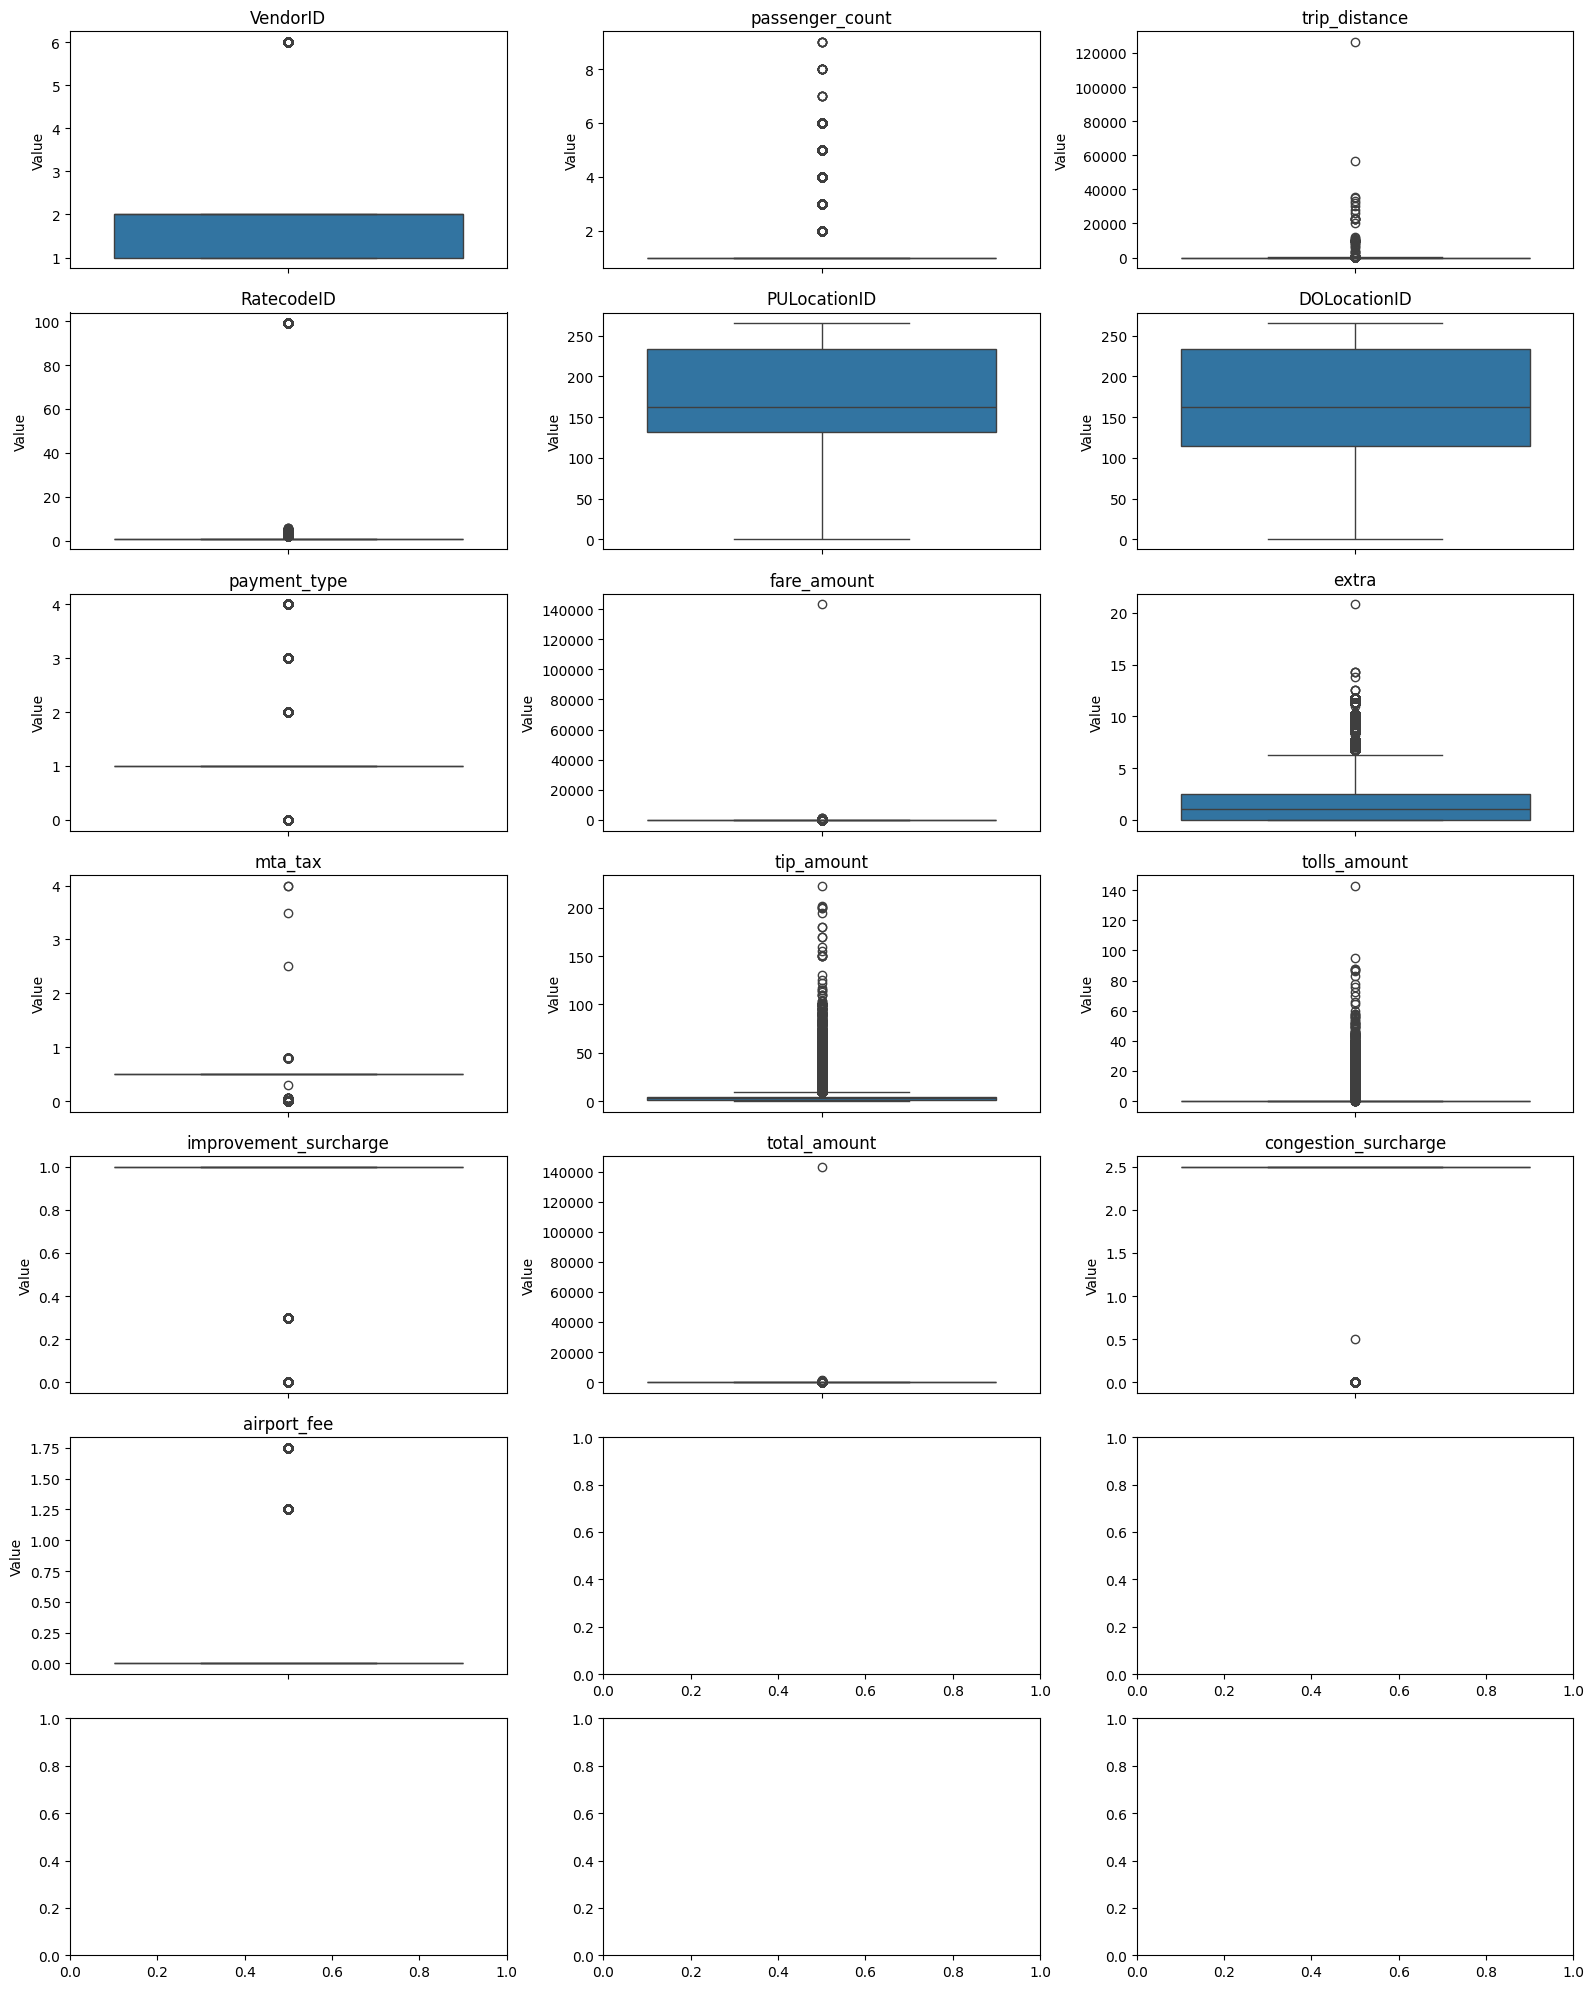

In [61]:
# Describe the data and check if there are any potential outliers present
# Check for potential out of place values in various columns

# As most columns have numerical values, visualising outliers using boxplots
fig, axes = plt.subplots(nrows=7, ncols=3, figsize=(16, 20))  
axes = axes.flatten()

# Plot boxplots
for i, col in enumerate(numerical_columns):
    sns.boxplot(y=df[col], ax=axes[i])
    axes[i].set_title(col)
    axes[i].set_ylabel("Value")

plt.tight_layout()
plt.show()

**2.3.1**  <font color = red>[10 marks]</font> <br>
Based on the above analysis, it seems that some of the outliers are present due to errors in registering the trips. Fix the outliers.

Some points you can look for:
- Entries where `trip_distance` is nearly 0 and `fare_amount` is more than 300
- Entries where `trip_distance` and `fare_amount` are 0 but the pickup and dropoff zones are different (both distance and fare should not be zero for different zones)
- Entries where `trip_distance` is more than 250  miles.
- Entries where `payment_type` is 0 (there is no payment_type 0 defined in the data dictionary)

These are just some suggestions. You can handle outliers in any way you wish, using the insights from above outlier analysis.

How will you fix each of these values? Which ones will you drop and which ones will you replace?

First, let us remove 7+ passenger counts as there are very less instances.

In [65]:
print(f"\nCurrent value distribution for column :\n {df['passenger_count'].value_counts(dropna=False)}")

# remove passenger_count > 6
df = df[df["passenger_count"] <= 6]  

# Reset index after filtering
df.reset_index(drop=True, inplace=True) 

print(f"\nUpdated value distribution for column :\n {df['passenger_count'].value_counts(dropna=False)}")


Current value distribution for column :
 passenger_count
1.0    1471778
2.0     277298
3.0      69034
4.0      38537
5.0      23871
6.0      15860
8.0         11
7.0          5
9.0          5
Name: count, dtype: int64

Updated value distribution for column :
 passenger_count
1.0    1471778
2.0     277298
3.0      69034
4.0      38537
5.0      23871
6.0      15860
Name: count, dtype: int64


In [66]:
print(f"Current total records in DataFrame: {df.shape[0]}")

# - Entries where `trip_distance` is nearly 0 and `fare_amount` is more than 300
df = df[~((df["trip_distance"] <= 0.01) & (df["fare_amount"] > 300))]

# - Entries where `trip_distance` and `fare_amount` are 0 
# but the pickup and dropoff zones are different (both distance and fare should not be zero for different zones)
df = df[~((df["trip_distance"] == 0) & (df["fare_amount"] == 0) & (df["PULocationID"] != df["DOLocationID"]))]

# - Entries where `trip_distance` is more than 250  miles.
df = df[~(df["trip_distance"] > 250)]

# - Entries where `payment_type` is 0 (there is no payment_type 0 defined in the data dictionary)
df = df[~(df["payment_type"] == 0)]

# Reset index after filtering
df.reset_index(drop=True, inplace=True)

print(f"Updated total records in DataFrame: {df.shape[0]}")

Current total records in DataFrame: 1896378
Updated total records in DataFrame: 1831391


Current total records in DataFrame: 1831391


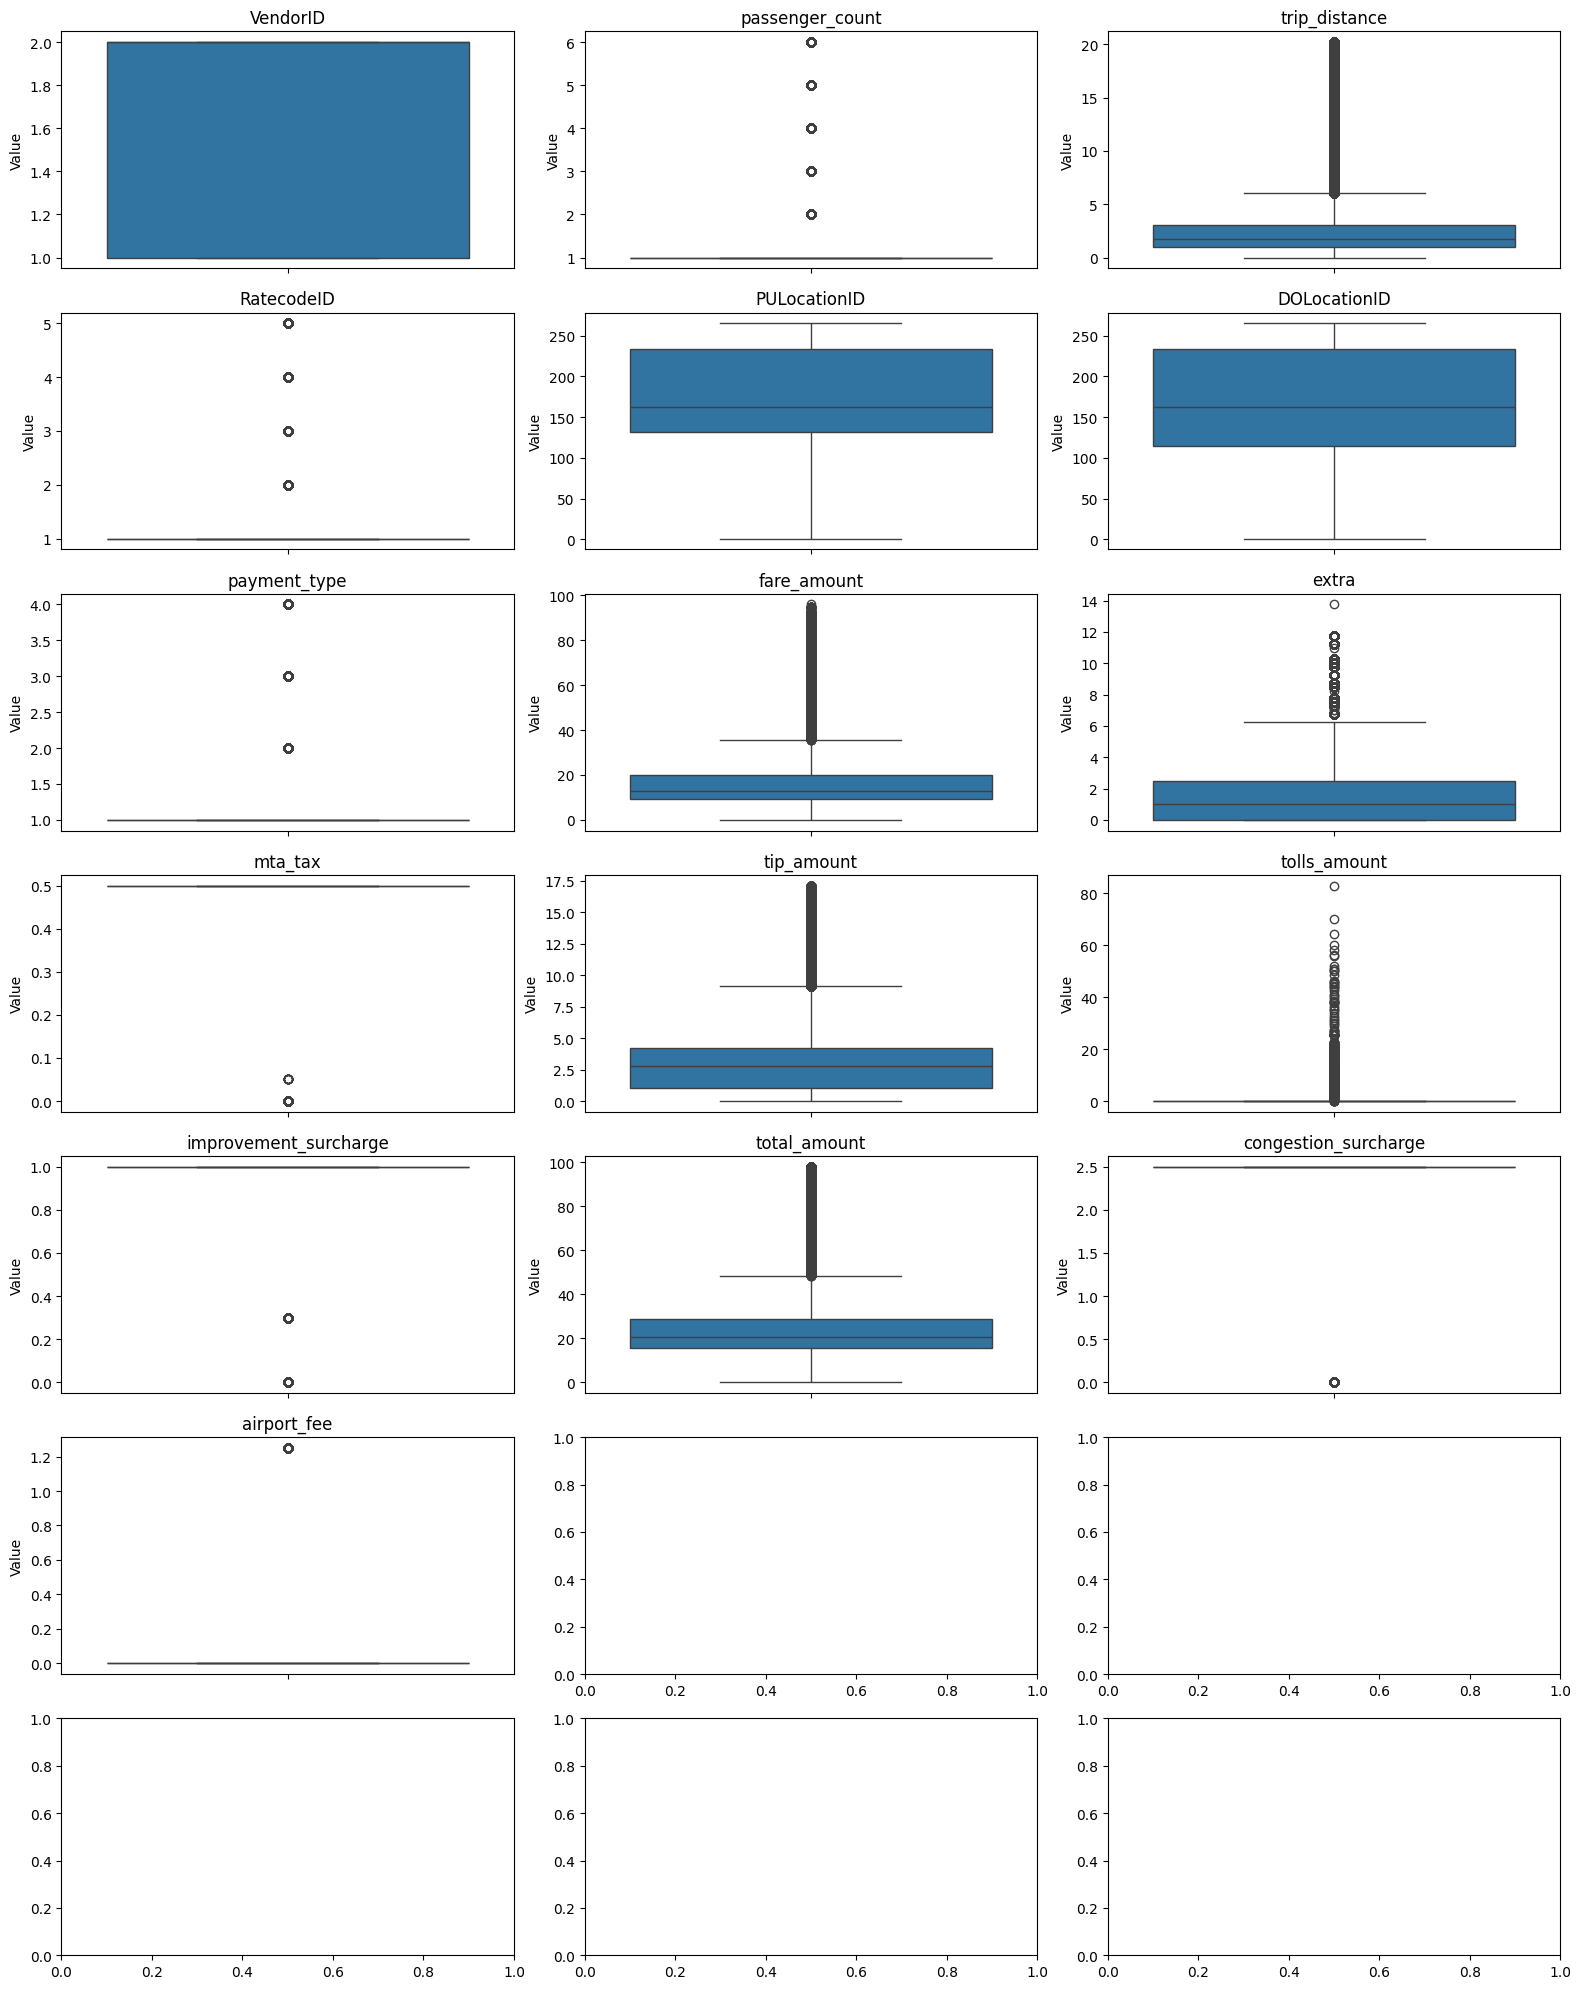

Updated total records in DataFrame: 1744641


In [67]:
# Do any columns need standardising?
print(f"Current total records in DataFrame: {df.shape[0]}")

# Filter invalid pick-up & drop-off times, i.e. 'tpep_dropoff_datetime' is before 'tpep_pickup_datetime'
df = df[df['tpep_dropoff_datetime'] > df['tpep_pickup_datetime']]

# Adding new column, representing the trip_duration
df['trip_duration_seconds'] = (df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']).dt.total_seconds()
df['trip_duration_minutes'] = df['trip_duration_seconds'] / 60
df['trip_duration_hours'] = df['trip_duration_seconds'] / 3600

# Continue with outlier handling

# Traditional outlier removal technique
def remove_outliers_iqr(df, column, remove_lower=True, remove_upper=True):
    # Q1, Q3, IQR
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    # bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filters
    if remove_lower and remove_upper:
        df_filtered = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    elif remove_lower:
        df_filtered = df[df[column] >= lower_bound]
    elif remove_upper:
        df_filtered = df[df[column] <= upper_bound]
    else:
        df_filtered = df.copy()  # No filtering applied

    # Reset index after filtering
    df_filtered.reset_index(drop=True, inplace=True)
    
    return df_filtered
    
# Handling outliers in `mta_tax` column :
    # Removing `mta_tax` column records where amount is not in 25-75 quantile range
df = remove_outliers_iqr(df, "mta_tax", remove_lower=False, remove_upper=True)

# Unconventional technique for removing outliers
    # As ideal outlier removal should be 1% - 5 % of total data, `remove_outliers_iqr` cannot be applied, as it would remove greater %

# Handling outliers in `RatecodeID` column :
    # Value : 6, is very less frequent & can be removed
    # Value : 99, does not represent any actual `RatecodeId` & can be removed
df = df[~df["RatecodeID"].isin([6, 99])]

# Handling outliers in `airport_fee` column :
    # Value : 1.75, does not represent any actual `airport_fee` & can be removed
df = df[~df["airport_fee"].isin([1.75])]

# Handling outliers in `congestion_surcharge` column :
    # Value : 0.5, is very less frequent & can be removed
df = df[~df["congestion_surcharge"].isin([.5])]

# Handling outliers in `trip_distance` column :
    # Removing `trip_distance` column records where distance is greater than 99 quantile of records
trip_distance_99_quantile = df['trip_distance'].quantile(0.99)
df = df[df["trip_distance"] <= trip_distance_99_quantile]

# Handling outliers in `fare_amount` column :
    # Removing `fare_amount` column records where amount is less than 2nd largest `fare_amount`, as the largest value is way out of bound
fare_amount_2nd_largest = df['fare_amount'].nlargest(2).iloc[-1]
df = df[df["fare_amount"] <= fare_amount_2nd_largest]

# Handling outliers in `tip_amount` column :
    # Removing `tip_amount` column records where distance is greater than 99 quantile of records
tip_amount_99_quantile = df['tip_amount'].quantile(0.99)
df = df[df["tip_amount"] <= tip_amount_99_quantile]

# Handling outliers in `total_amount` column :
    # Removing `total_amount` column records where amount is greater than 99 quantile of records
total_amount_99_quantile = df['total_amount'].quantile(0.99)
df = df[df["total_amount"] <= total_amount_99_quantile]

# Handling outliers in `trip_duration_minutes` column :
    # Removing `trip_duration_minutes` column records where time_duration is greater than 99 quantile of records
        # Outliers for `trip_duration_seconds` & `trip_duration_hours` will be handled as well
trip_duration_minutes_99_quantile = df['trip_duration_minutes'].quantile(0.99)
df = df[df["trip_duration_minutes"] <= trip_duration_minutes_99_quantile]

# Reset index after filtering
df.reset_index(drop=True, inplace=True) 

fig, axes = plt.subplots(nrows=7, ncols=3, figsize=(16, 20))  
axes = axes.flatten()

# Plot boxplots
for i, col in enumerate(numerical_columns):
    sns.boxplot(y=df[col], ax=axes[i])
    axes[i].set_title(col)
    axes[i].set_ylabel("Value")

plt.tight_layout()
plt.show()

print(f"Updated total records in DataFrame: {df.shape[0]}")

## **3** Exploratory Data Analysis
<font color = red>[90 marks]</font> <br>

In [69]:
df.columns.tolist()

['VendorID',
 'tpep_pickup_datetime',
 'tpep_dropoff_datetime',
 'passenger_count',
 'trip_distance',
 'RatecodeID',
 'PULocationID',
 'DOLocationID',
 'payment_type',
 'fare_amount',
 'extra',
 'mta_tax',
 'tip_amount',
 'tolls_amount',
 'improvement_surcharge',
 'total_amount',
 'congestion_surcharge',
 'tpep_pickup_datetime_hour',
 'airport_fee',
 'trip_duration_seconds',
 'trip_duration_minutes',
 'trip_duration_hours']

#### **3.1** General EDA: Finding Patterns and Trends
<font color = red>[40 marks]</font> <br>

**3.1.1** <font color = red>[3 marks]</font> <br>
Categorise the varaibles into Numerical or Categorical.
* `VendorID`:
* `tpep_pickup_datetime`:
* `tpep_dropoff_datetime`:
* `passenger_count`:
* `trip_distance`:
* `RatecodeID`:
* `PULocationID`:
* `DOLocationID`:
* `payment_type`:
* `pickup_hour`:
* `trip_duration`:


The following monetary parameters belong in the same category, is it categorical or numerical?


* `fare_amount`
* `extra`
* `mta_tax`
* `tip_amount`
* `tolls_amount`
* `improvement_surcharge`
* `total_amount`
* `congestion_surcharge`
* `airport_fee`

#### Categorical	: VendorID, RateCodeID, PULocationID, DOLocationID, payment_type, tpep_pickup_datetime_hour

#### Numerical	: passenger_count, trip_distance, fare_amount, extra, mta_tax, improvement_surcharge, tip_amount, tolls_amount, total_amount, congestion_surcharge, airport_fee, trip_duration_hours, trip_duration_minutes, trip_duration_seconds

#### Datetime	: tpep_pickup_datetime, tpep_dropoff_datetime

##### Temporal Analysis

**3.1.2** <font color = red>[5 marks]</font> <br>
Analyse the distribution of taxi pickups by hours, days of the week, and months.

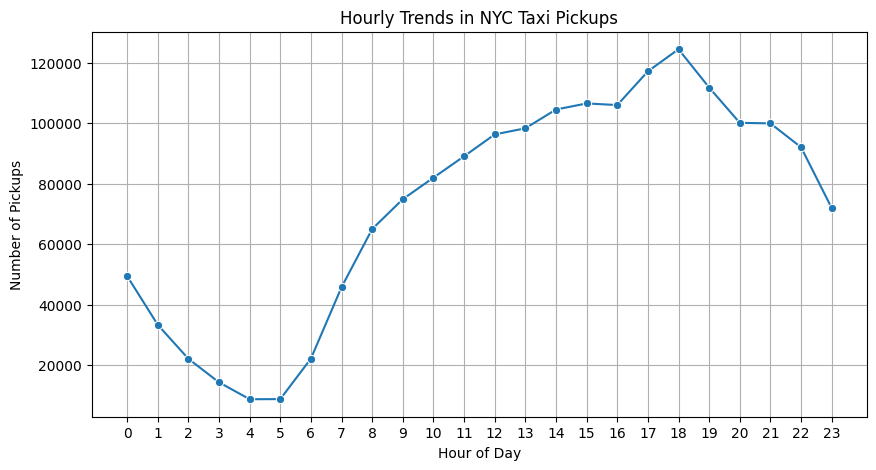

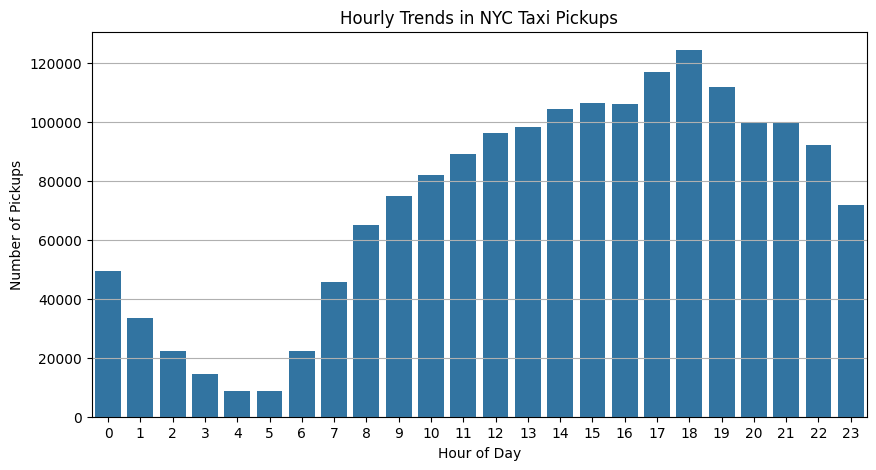

In [74]:
# Find and show the hourly trends in taxi pickups

# Group by pickup hour and count trips
hourly_trends = df.groupby('tpep_pickup_datetime_hour').size()

# lineplot
plt.figure(figsize=(10, 5))
sns.lineplot(x=hourly_trends.index, y=hourly_trends.values, marker='o')
# Labels and title
plt.xlabel("Hour of Day")
plt.ylabel("Number of Pickups")
plt.title("Hourly Trends in NYC Taxi Pickups")
plt.xticks(range(0, 24))
plt.grid()
plt.show()

# barplot
plt.figure(figsize=(10, 5))
sns.barplot(x=hourly_trends.index, y=hourly_trends.values)
# Labels and title
plt.xlabel("Hour of Day")
plt.ylabel("Number of Pickups")
plt.title("Hourly Trends in NYC Taxi Pickups")
plt.xticks(range(0, 24))  # Ensure all hours (0-23) are displayed
plt.grid(axis='y')
plt.show()

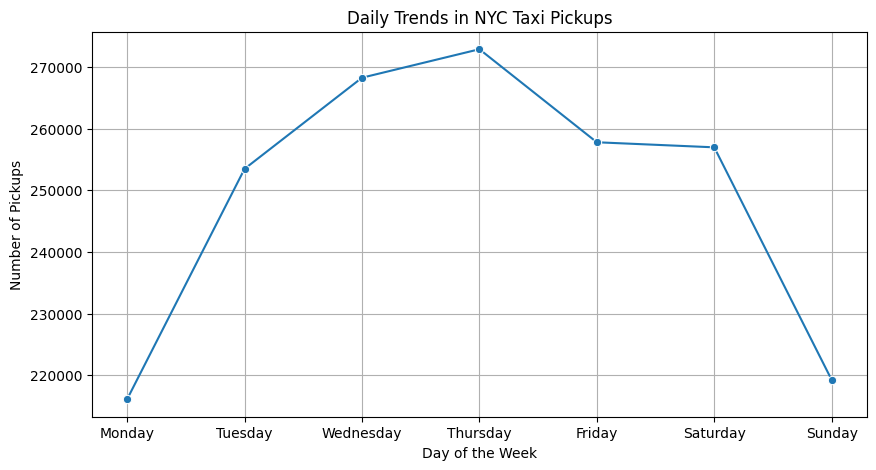

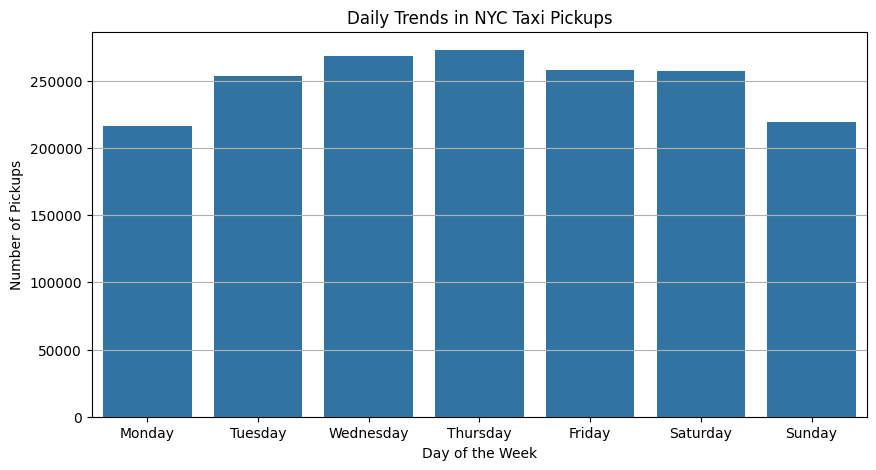

In [75]:
# Find and show the daily trends in taxi pickups (days of the week)

# Convert pickup datetime to day of the week
df['pickup_day'] = df['tpep_pickup_datetime'].dt.day_name()

days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Group by day of the week and count trips
daily_trends = df['pickup_day'].value_counts().reindex(days, fill_value=0)

# lineplot
plt.figure(figsize=(10, 5))
sns.lineplot(x=daily_trends.index, y=daily_trends.values, marker='o')
plt.xlabel("Day of the Week")
plt.ylabel("Number of Pickups")
plt.title("Daily Trends in NYC Taxi Pickups")
plt.grid()
plt.show()

# barplot
plt.figure(figsize=(10, 5))
sns.barplot(x=daily_trends.index, y=daily_trends.values)
plt.xlabel("Day of the Week")
plt.ylabel("Number of Pickups")
plt.title("Daily Trends in NYC Taxi Pickups")
plt.grid(axis='y')
plt.show()


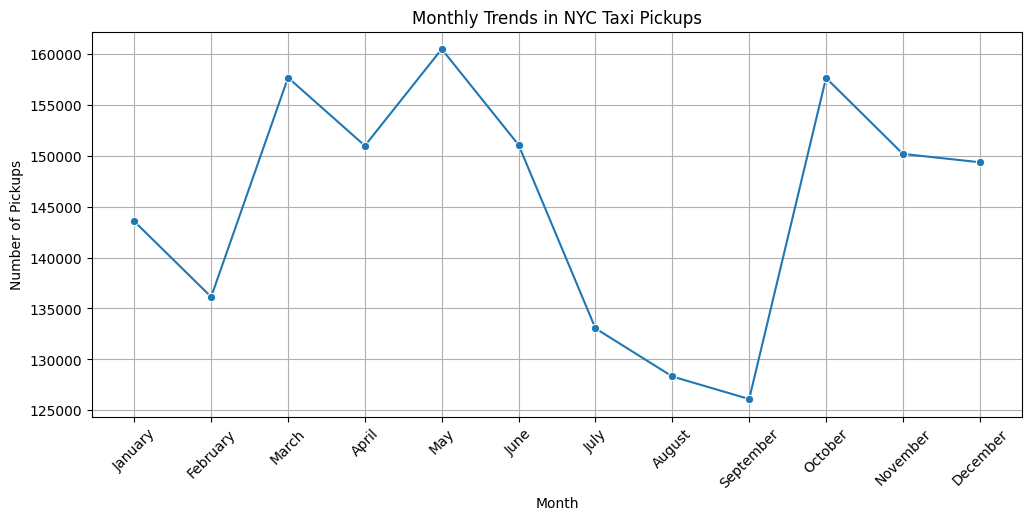

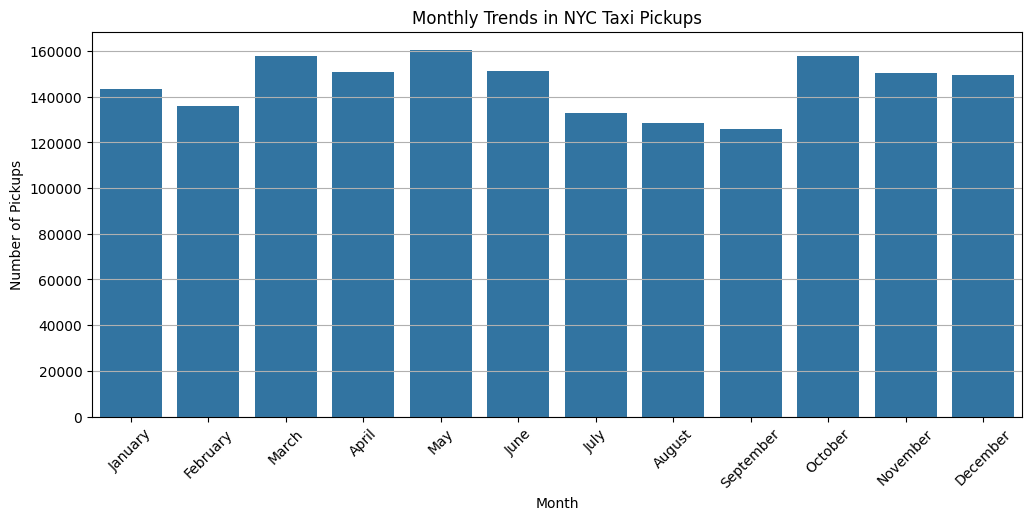

In [76]:
# Show the monthly trends in pickups
df['pickup_month'] = df['tpep_pickup_datetime'].dt.month_name()

months = [
    'January', 'February', 'March', 'April', 'May', 'June', 
    'July', 'August', 'September', 'October', 'November', 'December'
]

# Group by month and count trips
monthly_trends = df['pickup_month'].value_counts().reindex(months, fill_value=0)

# lineplot
plt.figure(figsize=(12, 5))
sns.lineplot(x=monthly_trends.index, y=monthly_trends.values, marker='o')
plt.xlabel("Month")
plt.ylabel("Number of Pickups")
plt.title("Monthly Trends in NYC Taxi Pickups")
plt.xticks(rotation=45) 
plt.grid()
plt.show()

# barplot
plt.figure(figsize=(12, 5))
sns.barplot(x=monthly_trends.index, y=monthly_trends.values)
plt.xlabel("Month")
plt.ylabel("Number of Pickups")
plt.title("Monthly Trends in NYC Taxi Pickups")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


##### Financial Analysis

Take a look at the financial parameters like `fare_amount`, `tip_amount`, `total_amount`, and also `trip_distance`. Do these contain zero/negative values?

In [79]:
# Analyse the above parameters

financial_cols = ['fare_amount', 'tip_amount', 'total_amount', 'trip_distance']

# Note - Most of columns containing inconsistent values have already been cleaned up, as part of data cleaning


Do you think it is beneficial to create a copy DataFrame leaving out the zero values from these?

YES - It can bebeneficial to create a copy DataFrame
Creating a copy without zero values is beneficial when zeros distort statistics. 
It also improves visualization clarity by preventing large zero clusters from dominating charts.

**3.1.3** <font color = red>[2 marks]</font> <br>
Filter out the zero values from the above columns.

**Note:** The distance might be 0 in cases where pickup and drop is in the same zone. Do you think it is suitable to drop such cases of zero distance?

In [82]:
# Create a df with non zero entries for the selected parameters.

df_cleaned = df[(df[financial_cols] > 0).all(axis=1)].copy()

**3.1.4** <font color = red>[3 marks]</font> <br>
Analyse the monthly revenue (`total_amount`) trend

        month  total_amount
4     January    2875803.78
3    February    2753048.60
7       March    3244535.53
0       April    3075007.64
8         May    3358878.16
6        June    3134098.14
5        July    2670546.65
1      August    2567085.33
11  September    2651312.49
10    October    3360431.07
9    November    3173873.97
2    December    3084625.19


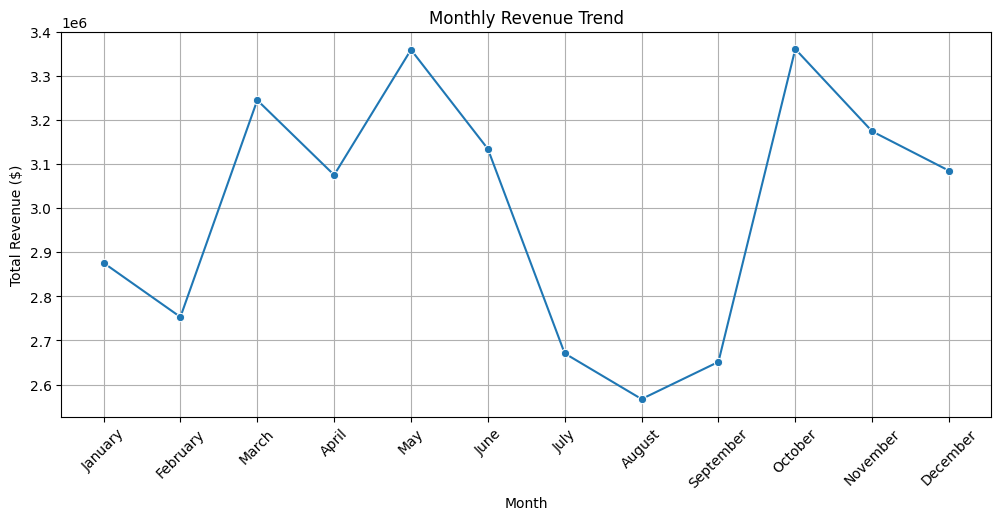

In [84]:
# Group data by month and analyse monthly revenue
df_cleaned['month'] = df_cleaned['tpep_pickup_datetime'].dt.month_name()

# Group by month and sum the total_amount
monthly_revenue = df_cleaned.groupby('month', as_index=False)['total_amount'].sum()

monthly_revenue['month'] = pd.Categorical(monthly_revenue['month'], categories=months, ordered=True)
monthly_revenue = monthly_revenue.sort_values('month')

# Print summary
print(monthly_revenue)

# Plot
plt.figure(figsize=(12, 5))
sns.lineplot(x=monthly_revenue['month'], y=monthly_revenue['total_amount'], marker='o')
plt.xlabel('Month')
plt.ylabel('Total Revenue ($)')
plt.title('Monthly Revenue Trend')
plt.xticks(rotation=45)
plt.grid()
plt.show()

**3.1.5** <font color = red>[3 marks]</font> <br>
Show the proportion of each quarter of the year in the revenue

  quarter  total_amount
0  2023Q1    8873387.91
1  2023Q2    9567983.94
2  2023Q3    7888944.47
3  2023Q4    9618930.23


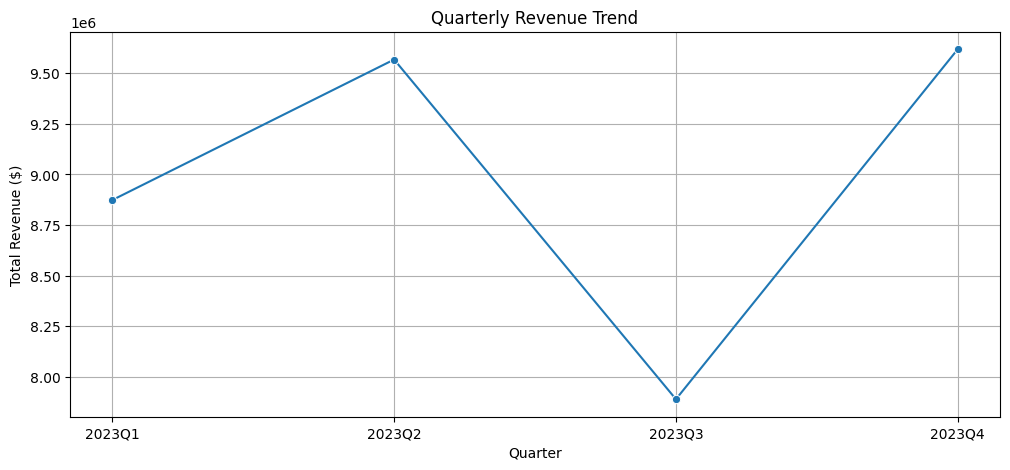

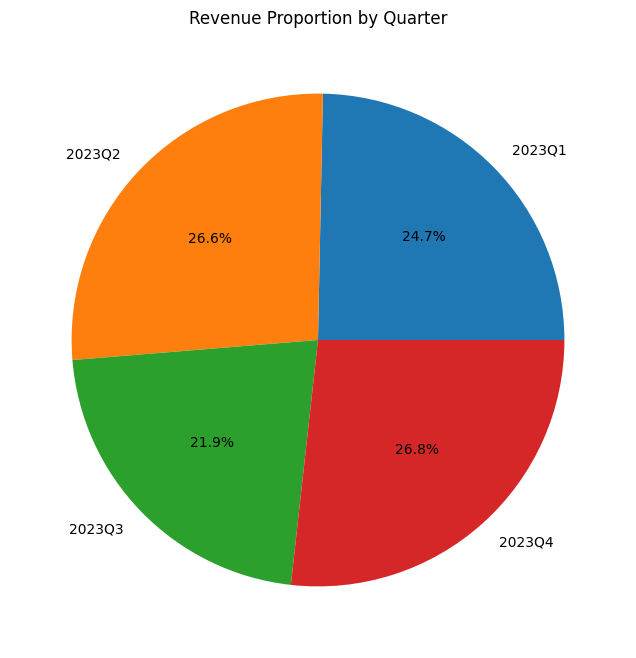

In [86]:
# Calculate proportion of each quarter
df_cleaned['quarter'] = df_cleaned['tpep_pickup_datetime'].dt.to_period('Q').astype(str)

# Group by quarter and sum total revenue
quarterly_revenue = df_cleaned.groupby('quarter', as_index=False)['total_amount'].sum()

# Sort quarters chronologically
quarterly_revenue = quarterly_revenue.sort_values('quarter')

# Print summary
print(quarterly_revenue)

# lineplot
plt.figure(figsize=(12, 5))
sns.lineplot(x=quarterly_revenue['quarter'], y=quarterly_revenue['total_amount'], marker='o')
plt.xlabel('Quarter')
plt.ylabel('Total Revenue ($)')
plt.title('Quarterly Revenue Trend')
plt.grid()
plt.show()

# pie chart
# Pie chart
plt.figure(figsize=(8, 8))
plt.pie(quarterly_revenue['total_amount'], labels=quarterly_revenue['quarter'], autopct='%1.1f%%')

# Title
plt.title('Revenue Proportion by Quarter')
plt.show()


**3.1.6** <font color = red>[3 marks]</font> <br>
Visualise the relationship between `trip_distance` and `fare_amount`. Also find the correlation value for these two.

**Hint:** You can leave out the trips with trip_distance = 0

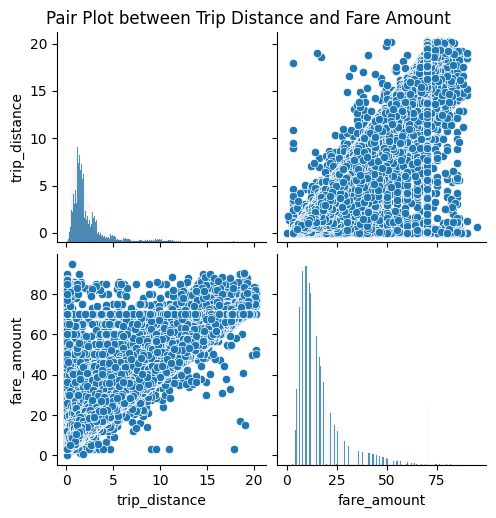

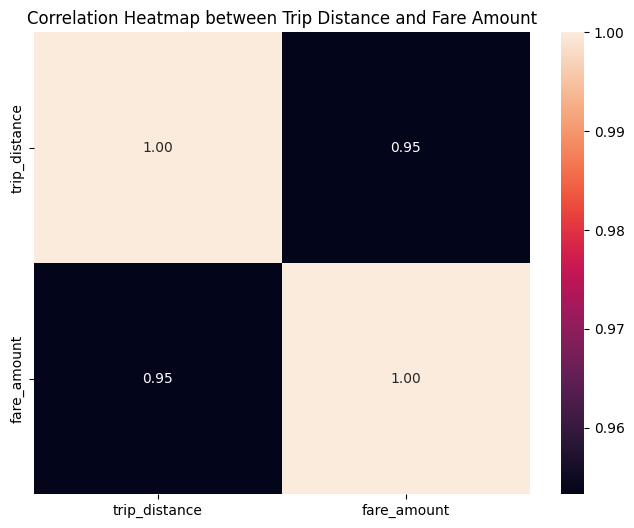

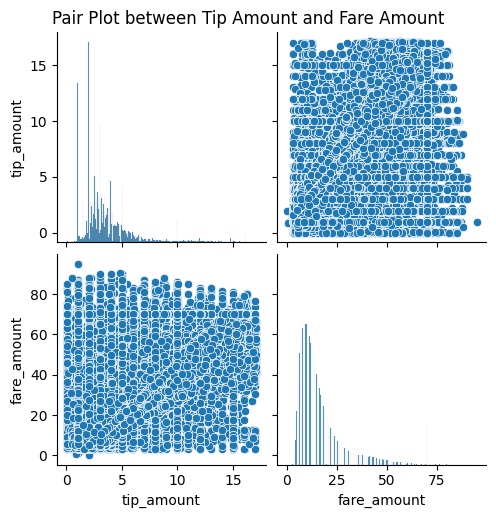

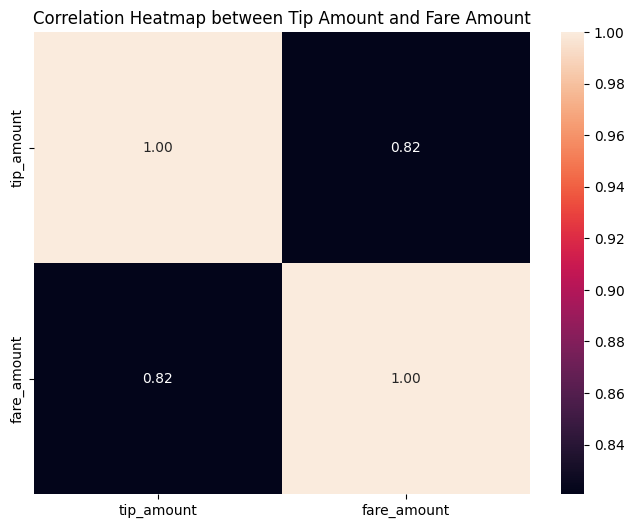

In [88]:
# Show how trip fare is affected by distance
df_cleaned = df_cleaned[df_cleaned['trip_distance'] != 0]

# pairplot
sns.pairplot(df_cleaned[['trip_distance', 'fare_amount']])
plt.suptitle('Pair Plot between Trip Distance and Fare Amount', y=1.02)
plt.show()

td_fa_corr = df_cleaned[['trip_distance', 'fare_amount']].corr()

# heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(td_fa_corr, annot=True, fmt=".2f")
plt.title('Correlation Heatmap between Trip Distance and Fare Amount')
plt.show()

# pairplot
sns.pairplot(df_cleaned[['tip_amount', 'fare_amount']])
plt.suptitle('Pair Plot between Tip Amount and Fare Amount', y=1.02)
plt.show()

td_fa_corr = df_cleaned[['tip_amount', 'fare_amount']].corr()

# heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(td_fa_corr, annot=True, fmt=".2f")
plt.title('Correlation Heatmap between Tip Amount and Fare Amount')
plt.show()


**3.1.7** <font color = red>[5 marks]</font> <br>
Find and visualise the correlation between:
1. `fare_amount` and trip duration (pickup time to dropoff time)
2. `fare_amount` and `passenger_count`
3. `tip_amount` and `trip_distance`

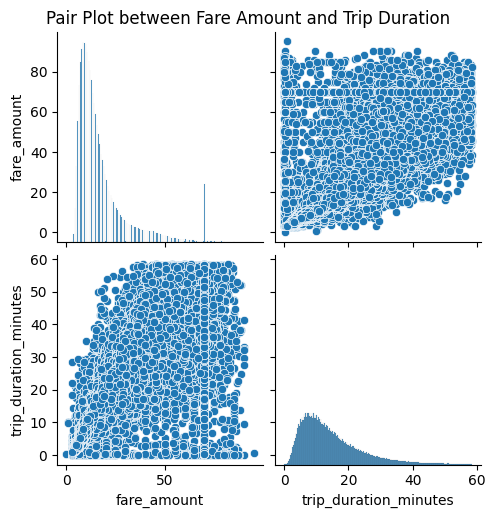

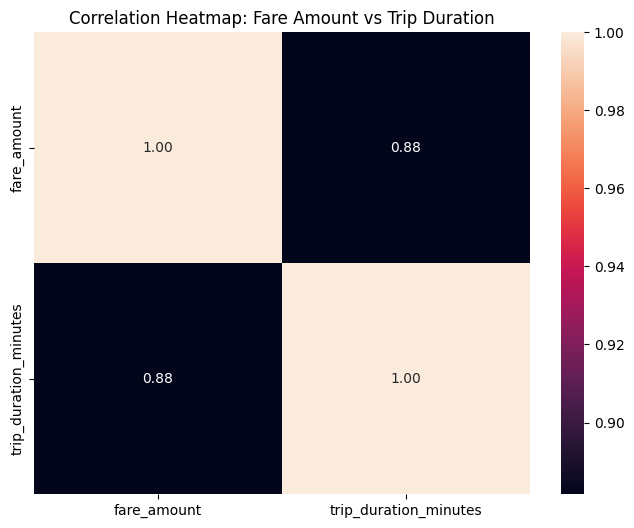

In [90]:
# Show relationship between fare and trip duration

# pairplot
sns.pairplot(df_cleaned[['fare_amount', 'trip_duration_minutes']])
plt.suptitle('Pair Plot between Fare Amount and Trip Duration', y=1.02)
plt.show()

fa_tdm_corr = df_cleaned[['fare_amount', 'trip_duration_minutes']].corr()

# heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(fa_tdm_corr, annot=True, fmt='.2f')
plt.title('Correlation Heatmap: Fare Amount vs Trip Duration')
plt.show()


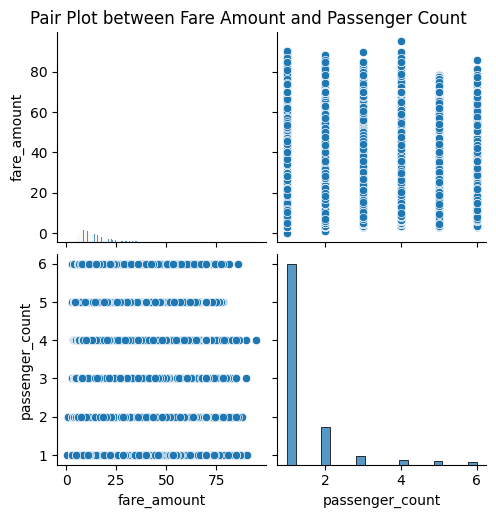

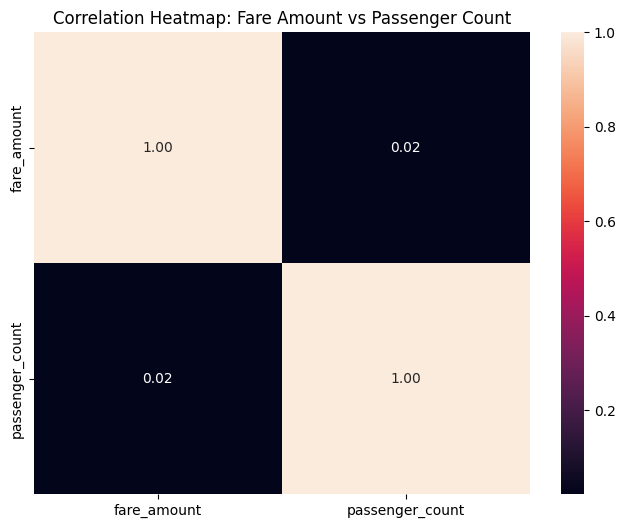

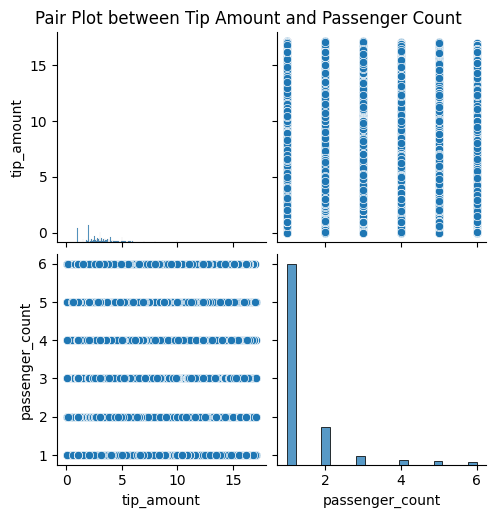

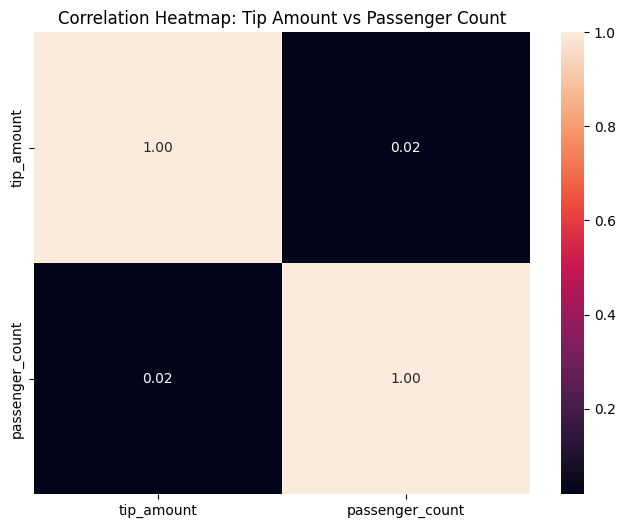

In [91]:
# Show relationship between fare and number of passengers

# pairplot
sns.pairplot(df_cleaned[['fare_amount', 'passenger_count']])
plt.suptitle('Pair Plot between Fare Amount and Passenger Count', y=1.02)
plt.show()

fa_pc_corr = df_cleaned[['fare_amount', 'passenger_count']].corr()

# heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(fa_pc_corr, annot=True, fmt='.2f')
plt.title('Correlation Heatmap: Fare Amount vs Passenger Count')
plt.show()

# pairplot
sns.pairplot(df_cleaned[['tip_amount', 'passenger_count']])
plt.suptitle('Pair Plot between Tip Amount and Passenger Count', y=1.02)
plt.show()

fa_pc_corr = df_cleaned[['tip_amount', 'passenger_count']].corr()

# heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(fa_pc_corr, annot=True, fmt='.2f')
plt.title('Correlation Heatmap: Tip Amount vs Passenger Count')
plt.show()




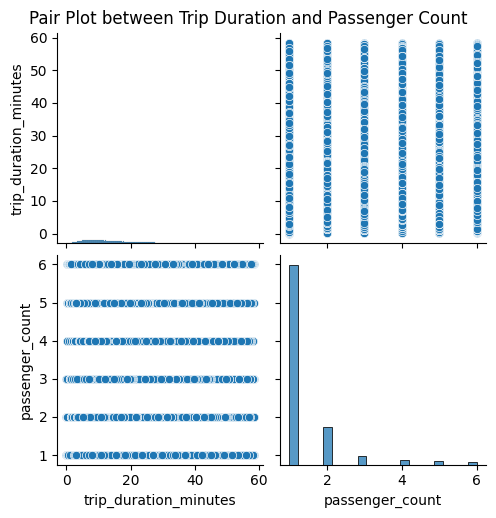

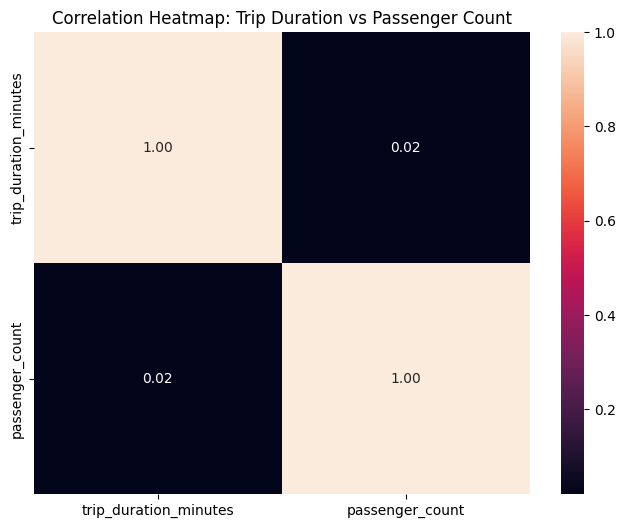

In [92]:
# pairplot
sns.pairplot(df_cleaned[['trip_duration_minutes', 'passenger_count']])
plt.suptitle('Pair Plot between Trip Duration and Passenger Count', y=1.02)
plt.show()

fa_pc_corr = df_cleaned[['trip_duration_minutes', 'passenger_count']].corr()

# heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(fa_pc_corr, annot=True, fmt='.2f')
plt.title('Correlation Heatmap: Trip Duration vs Passenger Count')
plt.show()

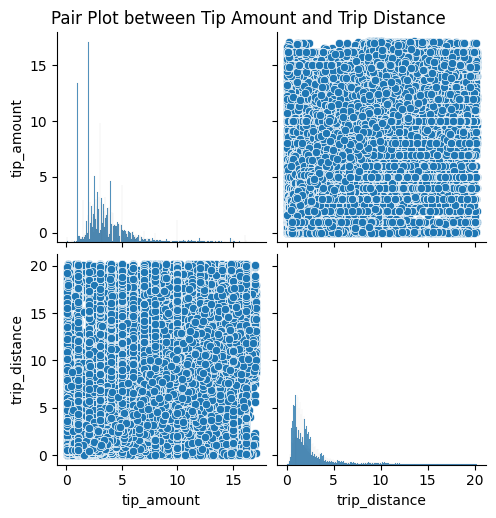

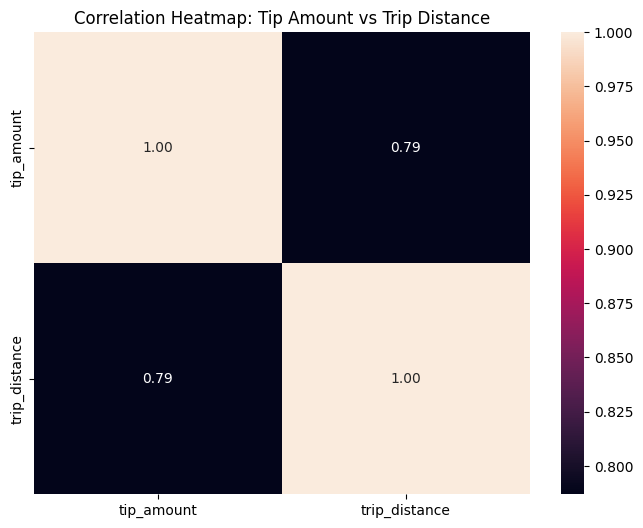

In [93]:
# Show relationship between tip and trip distance

# pairplot
sns.pairplot(df_cleaned[['tip_amount', 'trip_distance']])
plt.suptitle('Pair Plot between Tip Amount and Trip Distance', y=1.02)
plt.show()

ta_td_corr = df_cleaned[['tip_amount', 'trip_distance']].corr()

# heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(ta_td_corr, annot=True, fmt='.2f')
plt.title('Correlation Heatmap: Tip Amount vs Trip Distance')
plt.show()

**3.1.8** <font color = red>[3 marks]</font> <br>
Analyse the distribution of different payment types (`payment_type`)

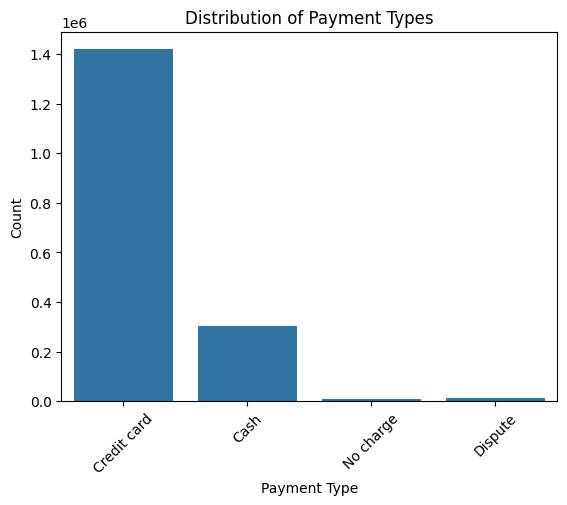

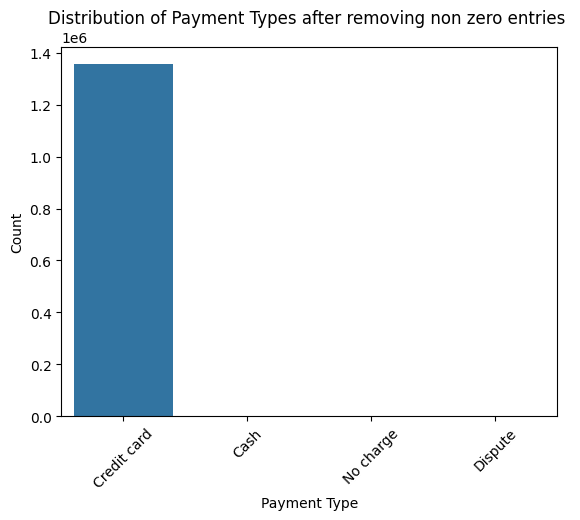

In [95]:
# Analyse the distribution of different payment types (payment_type).

# countplot - dataset
plt.title('Distribution of Payment Types')
sns.countplot(x='payment_type', data=df)
plt.xlabel('Payment Type')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1, 2, 3], labels=['Credit card', 'Cash', 'No charge', 'Dispute'], rotation=45)
plt.show()

# countplot - cleaned dataset
plt.title('Distribution of Payment Types after removing non zero entries ')
sns.countplot(x='payment_type', data=df_cleaned)
plt.xlabel('Payment Type')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1, 2, 3], labels=['Credit card', 'Cash', 'No charge', 'Dispute'], rotation=45)
plt.show()


- 1= Credit card
- 2= Cash
- 3= No charge
- 4= Dispute



##### Geographical Analysis

For this, you have to use the *taxi_zones.shp* file from the *taxi_zones* folder.

There would be multiple files inside the folder (such as *.shx, .sbx, .sbn* etc). You do not need to import/read any of the files other than the shapefile, *taxi_zones.shp*.

Do not change any folder structure - all the files need to be present inside the folder for it to work.

The folder structure should look like this:
```
Taxi Zones
|- taxi_zones.shp.xml
|- taxi_zones.prj
|- taxi_zones.sbn
|- taxi_zones.shp
|- taxi_zones.dbf
|- taxi_zones.shx
|- taxi_zones.sbx

 ```

 You only need to read the `taxi_zones.shp` file. The *shp* file will utilise the other files by itself.

We will use the *GeoPandas* library for geopgraphical analysis
```
import geopandas as gpd
```

More about geopandas and shapefiles: [About](https://geopandas.org/en/stable/about.html)


Reading the shapefile is very similar to *Pandas*. Use `gpd.read_file()` function to load the data (*taxi_zones.shp*) as a GeoDataFrame. Documentation: [Reading and Writing Files](https://geopandas.org/en/stable/docs/user_guide/io.html)

In [100]:
!pip install geopandas

**3.1.9** <font color = red>[2 marks]</font> <br>
Load the shapefile and display it.

In [102]:
import geopandas as gpd

# Read the shapefile using geopandas
zones = gpd.read_file('taxi_zones/taxi_zones.shp')
zones.head()

OBJECTID  Shape_Leng  Shape_Area                     zone  LocationID  \
0         1    0.116357    0.000782           Newark Airport           1   
1         2    0.433470    0.004866              Jamaica Bay           2   
2         3    0.084341    0.000314  Allerton/Pelham Gardens           3   
3         4    0.043567    0.000112            Alphabet City           4   
4         5    0.092146    0.000498            Arden Heights           5   

         borough                                           geometry  
0            EWR  POLYGON ((933100.918 192536.086, 933091.011 19...  
1         Queens  MULTIPOLYGON (((1033269.244 172126.008, 103343...  
2          Bronx  POLYGON ((1026308.77 256767.698, 1026495.593 2...  
3      Manhattan  POLYGON ((992073.467 203714.076, 992068.667 20...  
4  Staten Island  POLYGON ((935843.31 144283.336, 936046.565 144...

Now, if you look at the DataFrame created, you will see columns like: `OBJECTID`,`Shape_Leng`, `Shape_Area`, `zone`, `LocationID`, `borough`, `geometry`.
<br><br>

Now, the `locationID` here is also what we are using to mark pickup and drop zones in the trip records.

The geometric parameters like shape length, shape area and geometry are used to plot the zones on a map.

This can be easily done using the `plot()` method.

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    263 non-null    int32   
 1   Shape_Leng  263 non-null    float64 
 2   Shape_Area  263 non-null    float64 
 3   zone        263 non-null    object  
 4   LocationID  263 non-null    int32   
 5   borough     263 non-null    object  
 6   geometry    263 non-null    geometry
dtypes: float64(2), geometry(1), int32(2), object(2)
memory usage: 12.5+ KB
None


<Axes: >

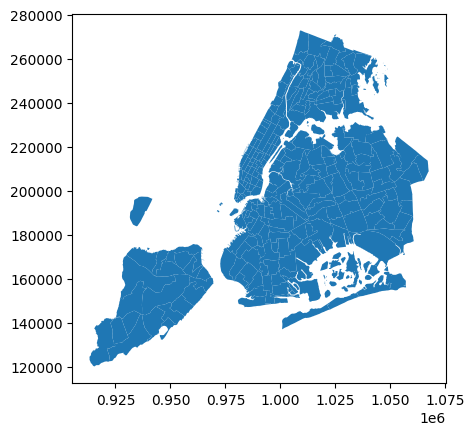

In [104]:
print(zones.info())
zones.plot()

Now, you have to merge the trip records and zones data using the location IDs.



**3.1.10** <font color = red>[3 marks]</font> <br>
Merge the zones data into trip data using the `locationID` and `PULocationID` columns.

In [107]:
# Merge zones and trip records using locationID and PULocationID
df_with_zones = df.merge(zones, left_on='PULocationID', right_on='LocationID', how='left')

print(df_with_zones.head())

   VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-01-01 00:07:18   2023-01-01 00:23:15              1.0   
1         2  2023-01-01 00:16:41   2023-01-01 00:21:46              2.0   
2         2  2023-01-01 00:14:03   2023-01-01 00:24:36              3.0   
3         2  2023-01-01 00:24:30   2023-01-01 00:29:55              1.0   
4         1  2023-01-01 00:42:56   2023-01-01 01:16:33              2.0   

   trip_distance  RatecodeID  PULocationID  DOLocationID  payment_type  \
0           7.74         1.0           138           256             2   
1           1.24         1.0           161           237             1   
2           1.44         1.0           237           141             2   
3           0.54         1.0           143           142             2   
4           7.10         1.0           246            37             1   

   fare_amount  ...  trip_duration_hours  pickup_day  pickup_month  OBJECTID  \
0         32.4  ...     

**3.1.11** <font color = red>[3 marks]</font> <br>
Group data by location IDs to find the total number of trips per location ID

In [109]:
# Group data by location and calculate the number of trips
trips_per_location = df_with_zones.groupby('LocationID').size().reset_index(name='total_trips').sort_values(by='total_trips', ascending = False)
print(trips_per_location)

     LocationID  total_trips
222       237.0        86336
147       161.0        84337
221       236.0        77077
148       162.0        64666
171       186.0        62585
..          ...          ...
101       115.0            1
206       221.0            1
158       172.0            1
235       251.0            1
191       206.0            1

[248 rows x 2 columns]


**3.1.12** <font color = red>[2 marks]</font> <br>
Now, use the grouped data to add number of trips to the GeoDataFrame.

We will use this to plot a map of zones showing total trips per zone.

In [111]:
# Merge trip counts back to the zones GeoDataFrame
df_wz_trips = df_with_zones.merge(trips_per_location, left_on='LocationID', right_on='LocationID', how='left')

df_wz_trips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1744689 entries, 0 to 1744688
Data columns (total 32 columns):
 #   Column                     Dtype         
---  ------                     -----         
 0   VendorID                   int64         
 1   tpep_pickup_datetime       datetime64[us]
 2   tpep_dropoff_datetime      datetime64[us]
 3   passenger_count            float64       
 4   trip_distance              float64       
 5   RatecodeID                 float64       
 6   PULocationID               int64         
 7   DOLocationID               int64         
 8   payment_type               int64         
 9   fare_amount                float64       
 10  extra                      float64       
 11  mta_tax                    float64       
 12  tip_amount                 float64       
 13  tolls_amount               float64       
 14  improvement_surcharge      float64       
 15  total_amount               float64       
 16  congestion_surcharge       float64  

The next step is creating a color map (choropleth map) showing zones by the number of trips taken.

Again, you can use the `zones.plot()` method for this. [Plot Method GPD](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.plot.html#geopandas.GeoDataFrame.plot)

But first, you need to define the figure and axis for the plot.

`fig, ax = plt.subplots(1, 1, figsize = (12, 10))`

This function creates a figure (fig) and a single subplot (ax)

---

After setting up the figure and axis, we can proceed to plot the GeoDataFrame on this axis. This is done in the next step where we use the plot method of the GeoDataFrame.

You can define the following parameters in the `zones.plot()` method:
```
column = '',
ax = ax,
legend = True,
legend_kwds = {'label': "label", 'orientation': "<horizontal/vertical>"}
```

To display the plot, use `plt.show()`.

**3.1.13** <font color = red>[3 marks]</font> <br>
Plot a color-coded map showing zone-wise trips

Old data-type : <class 'pandas.core.frame.DataFrame'>
New data-type : <class 'geopandas.geodataframe.GeoDataFrame'>


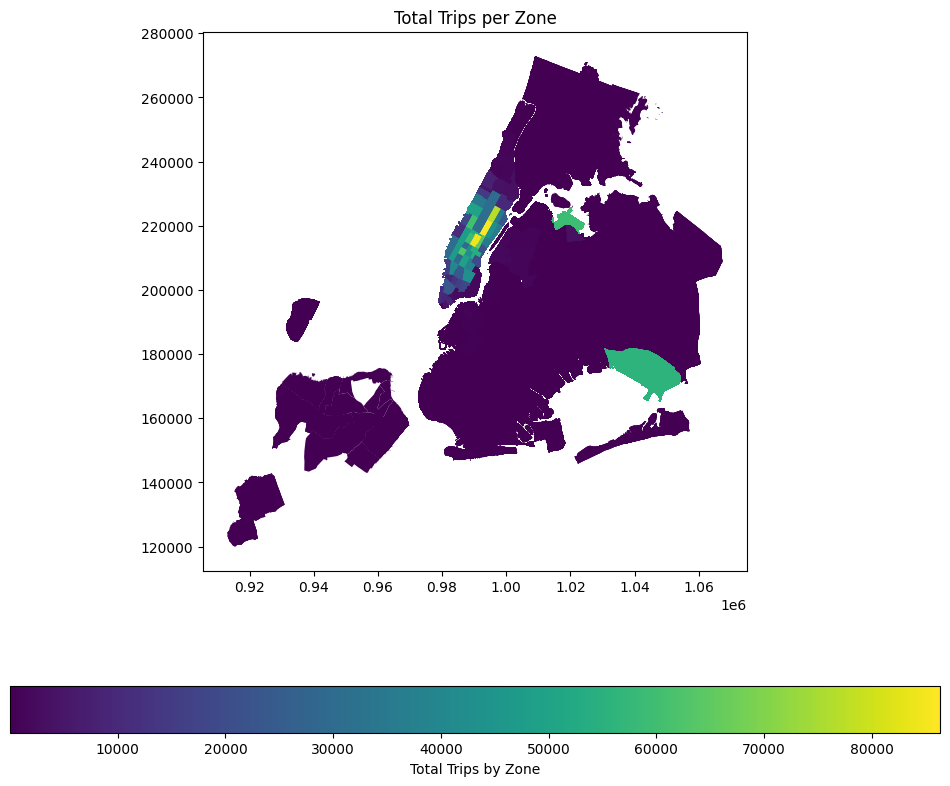

In [115]:
#  converting pandas dataframe to geodataframe
print(f"Old data-type : {type(df_wz_trips)}")
df_wz_trips = gpd.GeoDataFrame(df_wz_trips, geometry='geometry')
print(f"New data-type : {type(df_wz_trips)}")

# Define figure and axis
fig, ax = plt.subplots(1, 1, figsize = (12, 10))

# Plot the map and display it
df_wz_trips.plot(
    column='total_trips', 
    ax=ax, 
    legend=True, 
    legend_kwds={'label': "Total Trips by Zone", 'orientation': "horizontal"})

# Title and display
plt.title('Total Trips per Zone')
plt.show()

         VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
1247079         2  2023-04-13 21:48:27   2023-04-13 21:56:42              1.0   
1560239         1  2023-07-19 12:15:22   2023-07-19 12:26:44              1.0   
136846          2  2023-01-30 19:25:44   2023-01-30 19:32:25              1.0   
1251883         2  2023-04-19 08:18:06   2023-04-19 08:24:37              1.0   
1251879         2  2023-04-19 08:28:57   2023-04-19 08:35:52              1.0   
...           ...                  ...                   ...              ...   
1743895         2  2023-09-30 20:20:09   2023-09-30 20:44:49              1.0   
1744217         2  2023-09-30 21:02:44   2023-09-30 21:02:50              1.0   
1744325         2  2023-09-30 21:40:53   2023-09-30 21:50:44              1.0   
1744513         2  2023-09-30 22:29:32   2023-09-30 22:36:11              3.0   
1744669         2  2023-09-30 22:53:11   2023-09-30 23:17:28              1.0   

         trip_distance  Rat

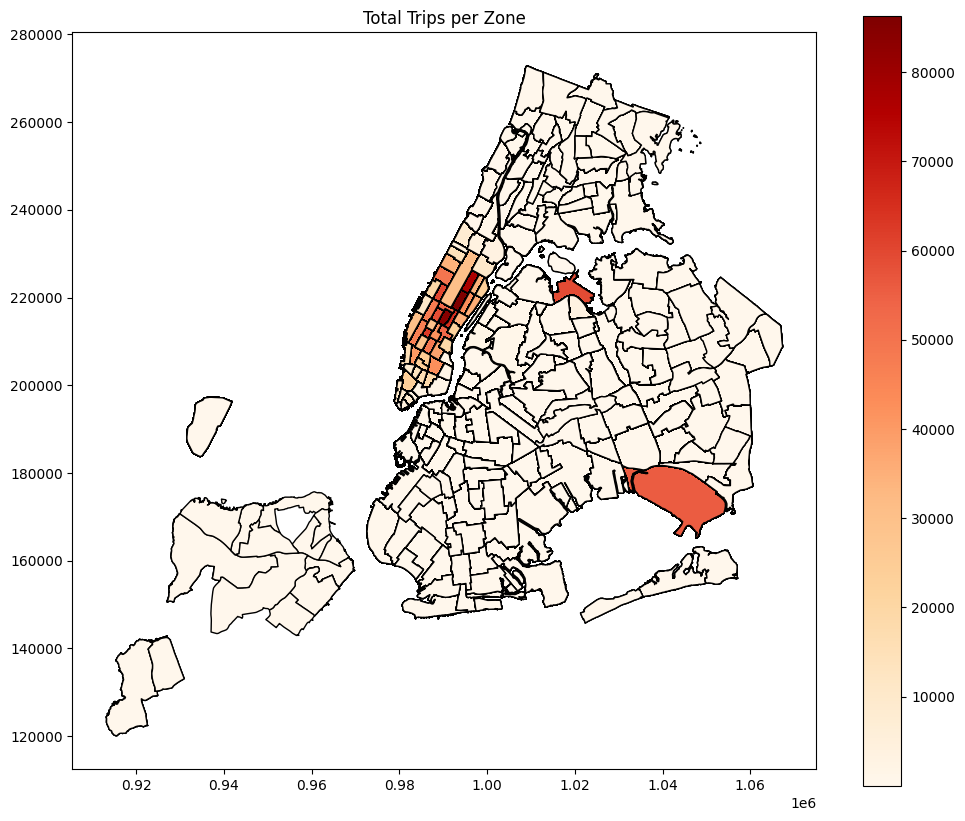

In [116]:
# can you try displaying the zones DF sorted by the number of trips?

df_wz_trips_sorted = df_wz_trips.sort_values(by="total_trips", ascending=False)
print(df_wz_trips_sorted)

print(df_wz_trips_sorted[['zone', 'LocationID','total_trips']])

# Define figure and axis
fig, ax = plt.subplots(figsize=(12, 10))

# Plot the map
df_wz_trips_sorted.plot(
    column="total_trips",
    ax=ax, 
    legend=True, 
    cmap="OrRd", 
    edgecolor="black"
)

# Title and display
plt.title("Total Trips per Zone")
plt.show()


Here we have completed the temporal, financial and geographical analysis on the trip records.

**Compile your findings from general analysis below:**

You can consider the following points:

* Busiest hours, days and months
* Trends in revenue collected
* Trends in quarterly revenue
* How fare depends on trip distance, trip duration and passenger counts
* How tip amount depends on trip distance
* Busiest zones


#### **3.2** Detailed EDA: Insights and Strategies
<font color = red>[50 marks]</font> <br>

Having performed basic analyses for finding trends and patterns, we will now move on to some detailed analysis focussed on operational efficiency, pricing strategies, and customer experience.

##### Operational Efficiency

Analyze variations by time of day and location to identify bottlenecks or inefficiencies in routes

**3.2.1** <font color = red>[3 marks]</font> <br>
Identify slow routes by calculating the average time taken by cabs to get from one zone to another at different hours of the day.

Speed on a route *X* for hour *Y* = (*distance of the route X / average trip duration for hour Y*)

In [125]:
# Find routes which have the slowest speeds at different times of the day

route_speed = df.groupby(['PULocationID', 'DOLocationID', 'tpep_pickup_datetime_hour']).agg(
    total_distance=('trip_distance', 'sum'),
    avg_duration=('trip_duration_hours', 'mean'),
    trip_count=('trip_distance', 'count')
).reset_index()

# Calculate speed (distance per hour)
route_speed['avg_speed'] = route_speed['total_distance'] / route_speed['avg_duration']

# Sort by speed to find the slowest routes
slowest_routes = route_speed.nsmallest(10, 'avg_speed')

# Display the slowest routes
print(slowest_routes)

    PULocationID  DOLocationID  tpep_pickup_datetime_hour  total_distance  \
0              1             1                          1             0.0   
4              1             1                          8             0.0   
6              1             1                         10             0.0   
9              1             1                         15             0.0   
15             1             1                         21             0.0   
16             1             1                         22             0.0   
17             1            79                          9             0.0   
18             1           264                          5             0.0   
19             1           264                         15             0.0   
20             1           264                         16             0.0   

    avg_duration  trip_count  avg_speed  
0       0.001111           1        0.0  
4       0.002222           1        0.0  
6       0.002500          

How does identifying high-traffic, high-demand routes help us?

**3.2.2** <font color = red>[3 marks]</font> <br>
Calculate the number of trips at each hour of the day and visualise them. Find the busiest hour and show the number of trips for that hour.

124399


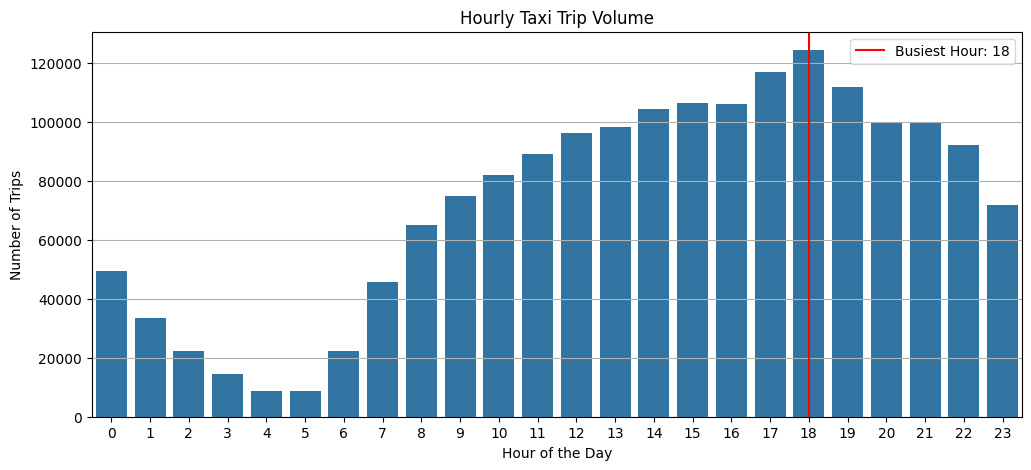

Busiest Hour: 18 with 124399 trips


In [128]:
# Visualise the number of trips per hour and find the busiest hour
hourly_trips = df.groupby('tpep_pickup_datetime_hour').size().reset_index(name='trip_count')

# Find the busiest hour
df_busiest_hour = hourly_trips.loc[hourly_trips['trip_count'].idxmax()]
busiest_hour = df_busiest_hour['tpep_pickup_datetime_hour']
busiest_hour_trips = df_busiest_hour['trip_count']

print(busiest_hour_trips) 
# Plot hourly trip volume
plt.figure(figsize=(12, 5))
sns.barplot(x=hourly_trips['tpep_pickup_datetime_hour'], y=hourly_trips['trip_count'])

# Highlight the busiest hour
plt.axvline(busiest_hour, color='r', label=f"Busiest Hour: {busiest_hour}")

# Labels and title
plt.xlabel("Hour of the Day")
plt.ylabel("Number of Trips")
plt.title("Hourly Taxi Trip Volume")
plt.xticks(range(0, 24)) 
plt.legend()
plt.grid(axis='y')

# Show plot
plt.show()

# Print the busiest hour and number of trips
print(f"Busiest Hour: {busiest_hour} with {busiest_hour_trips} trips")


Remember, we took a fraction of trips. To find the actual number, you have to scale the number up by the sampling ratio.

**3.2.3** <font color = red>[2 mark]</font> <br>
Find the actual number of trips in the five busiest hours

In [131]:
# Scale up the number of trips

# Fill in the value of your sampling fraction and use that to scale up the numbers
# 5% of actual data was used for sampling, assumping ratio of records removed from sampled dataframe, would be similar in actual dataframe as well
sample_fraction = 0.05 

# Count trips per hour in the sampled data
hourly_trips = df.groupby('tpep_pickup_datetime_hour').size().reset_index(name='trip_count')

# Scale up the trip count to estimate actual trips
hourly_trips['actual_total_trips'] = hourly_trips['trip_count'] / sample_fraction

# actual trip counts for 5 businest hours
print(hourly_trips['actual_total_trips'].nlargest(5))

18    2487980.0
17    2341860.0
19    2234800.0
15    2129940.0
16    2119040.0
Name: actual_total_trips, dtype: float64


**3.2.4** <font color = red>[3 marks]</font> <br>
Compare hourly traffic pattern on weekdays. Also compare for weekend.

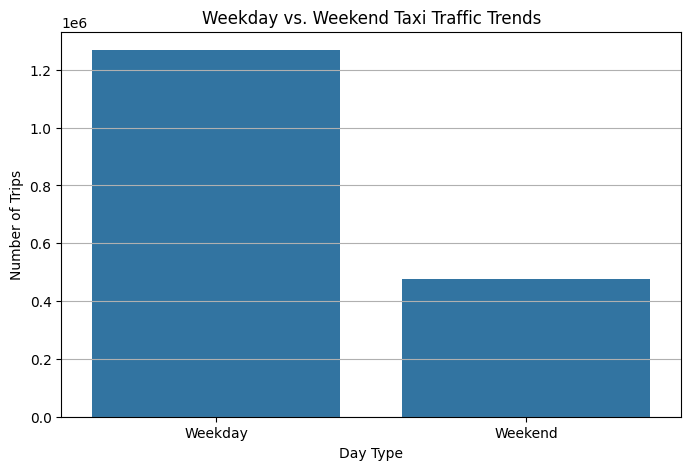

  day_type  trip_count
0  Weekday     1268436
1  Weekend      476205


In [133]:
# Compare traffic trends for the week days and weekends
df['day_of_week'] = df['tpep_pickup_datetime'].dt.day_name()

# Categorize into weekday vs. weekend
df['day_type'] = df['day_of_week'].apply(lambda x: 'Weekday' if x in ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'] else 'Weekend')

# Count trips for weekdays and weekends
day_type_trips = df.groupby('day_type').size().reset_index(name='trip_count')

# Bar plot to compare weekday vs. weekend traffic
plt.figure(figsize=(8, 5))
sns.barplot(x=day_type_trips['day_type'], y=day_type_trips['trip_count'])
plt.xlabel("Day Type")
plt.ylabel("Number of Trips")
plt.title("Weekday vs. Weekend Taxi Traffic Trends")
plt.grid(axis='y')
plt.show()

print(day_type_trips)


What can you infer from the above patterns? How will finding busy and quiet hours for each day help us?

**3.2.5** <font color = red>[3 marks]</font> <br>
Identify top 10 zones with high hourly pickups. Do the same for hourly dropoffs. Show pickup and dropoff trends in these zones.

In [136]:
# Find top 10 pickup and dropoff zones
pickup_zones = df.groupby('PULocationID').size().reset_index(name='pickup_count')
dropoff_zones = df.groupby('DOLocationID').size().reset_index(name='dropoff_count')

# Get top 10 pickup and dropoff zones
top_pickup_zones = pickup_zones.nlargest(10, 'pickup_count')
top_dropoff_zones = dropoff_zones.nlargest(10, 'dropoff_count')

# Display results
print("Top 10 Pickup Zones:\n", top_pickup_zones)
print("\nTop 10 Dropoff Zones:\n", top_dropoff_zones)

Top 10 Pickup Zones:
      PULocationID  pickup_count
223           237         86336
148           161         84337
222           236         77077
149           162         64666
172           186         62585
129           142         60206
125           138         59311
216           230         58933
119           132         55741
157           170         53593

Top 10 Dropoff Zones:
      DOLocationID  dropoff_count
226           236          80342
227           237          76705
154           161          69581
163           170          52903
220           230          52063
155           162          50897
135           142          50423
229           239          49765
134           141          47695
66             68          44678


**3.2.6** <font color = red>[3 marks]</font> <br>
Find the ratio of pickups and dropoffs in each zone. Display the 10 highest (pickup/drop) and 10 lowest (pickup/drop) ratios.

In [138]:
# Find the top 10 and bottom 10 pickup/dropoff ratios
# Merge `pickup_zones` & `dropoff_zones` based on `PULocationID` & `DOLocationID`
zone_ratios = pickup_zones.merge(dropoff_zones, left_on='PULocationID', right_on='DOLocationID', how='inner')

# Calculate the pickup/dropoff ratio
zone_ratios['pu_do_ratios'] = round((zone_ratios['pickup_count'] / zone_ratios['dropoff_count']), 2)

# Get top 10 and bottom 10 zones based on ratio
top_10_ratios = zone_ratios.nlargest(10, 'pu_do_ratios')
bottom_10_ratios = zone_ratios.nsmallest(10, 'pu_do_ratios')

# Display results
print("Top 10 Pickup/Dropoff Ratio Zones:\n", top_10_ratios)
print("\nBottom 10 Pickup/Dropoff Ratio Zones:\n", bottom_10_ratios)

Top 10 Pickup/Dropoff Ratio Zones:
      PULocationID  pickup_count  DOLocationID  dropoff_count  pu_do_ratios
119           132         55741           132          12008          4.64
64             70          3493            70            933          3.74
125           138         59311           138          20745          2.86
171           186         62585           186          39141          1.60
172           187             3           187              2          1.50
188           204             3           204              2          1.50
38             43         30449            43          21963          1.39
101           114         23919           114          17257          1.39
232           249         40155           249          29971          1.34
149           162         64666           162          50897          1.27

Bottom 10 Pickup/Dropoff Ratio Zones:
      PULocationID  pickup_count  DOLocationID  dropoff_count  pu_do_ratios
126           139       

**3.2.7** <font color = red>[3 marks]</font> <br>
Identify zones with high pickup and dropoff traffic during night hours (11PM to 5AM)

In [140]:
# During night hours (11pm to 5am) find the top 10 pickup and dropoff zones
# Note that the top zones should be of night hours and not the overall top zones
night_hours = [23, 0, 1, 2, 3, 4, 5]
df_night = df[df['tpep_pickup_datetime_hour'].isin(night_hours)]

night_pickup_zones = df_night.groupby('PULocationID').size().reset_index(name='pickup_count')
night_dropoff_zones = df_night.groupby('DOLocationID').size().reset_index(name='dropoff_count')

# Get top 10 night pickup and dropoff zones
top_night_pickup_zones = night_pickup_zones.nlargest(10, 'pickup_count')
top_night_dropoff_zones = night_dropoff_zones.nlargest(10, 'dropoff_count')

# Display results
print("\nTop 10 Pickup Zones:\n", top_night_pickup_zones)
print("\nTop 10 Dropoff Zones:\n", top_night_dropoff_zones)


Top 10 Pickup Zones:
      PULocationID  pickup_count
65             79         15478
205           249         12403
104           132         10461
37             48         10353
120           148          9566
89            114          8693
187           230          8018
151           186          6882
134           164          6069
55             68          5957

Top 10 Dropoff Zones:
      DOLocationID  dropoff_count
76             79           8234
45             48           6715
160           170           6155
65             68           5709
99            107           5665
131           141           5183
235           249           4889
249           263           4887
216           230           4424
138           148           4333


Now, let us find the revenue share for the night time hours and the day time hours. After this, we will move to deciding a pricing strategy.

**3.2.8** <font color = red>[2 marks]</font> <br>
Find the revenue share for nighttime and daytime hours.

Revenue Share (%):
 {'Night Revenue': 12.53, 'Day Revenue': 87.47}


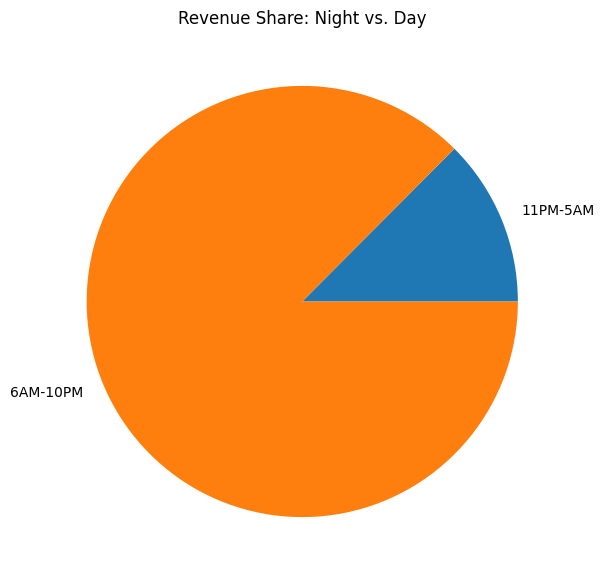

In [142]:
# Filter for night hours (11 PM to 5 AM)
day_hours = list(set(range(24)) - set(night_hours))

# Filter nighttime and daytime trips
night_revenue = df[df['tpep_pickup_datetime_hour'].isin(night_hours)]['total_amount'].sum()
day_revenue = df[df['tpep_pickup_datetime_hour'].isin(day_hours)]['total_amount'].sum()

# Compute revenue share
total_revenue = night_revenue + day_revenue
revenue_share = {
    "Night Revenue": round((night_revenue / total_revenue) * 100, 2),
    "Day Revenue": round((day_revenue / total_revenue) * 100, 2)
}

print("Revenue Share (%):\n", revenue_share)

# pie chart
plt.figure(figsize=(7, 7))
plt.pie([night_revenue, day_revenue], labels=["11PM-5AM", "6AM-10PM"])
plt.title("Revenue Share: Night vs. Day")
plt.show()

##### Pricing Strategy

**3.2.9** <font color = red>[2 marks]</font> <br>
For the different passenger counts, find the average fare per mile per passenger.

For instance, suppose the average fare per mile for trips with 3 passengers is 3 USD/mile, then the fare per mile per passenger will be 1 USD/mile.

   passenger_count  fare_per_mile_per_passenger
0              1.0                     8.528687
1              2.0                     4.363587
2              3.0                     2.965119
3              4.0                     2.784890
4              5.0                     1.540804
5              6.0                     1.305722


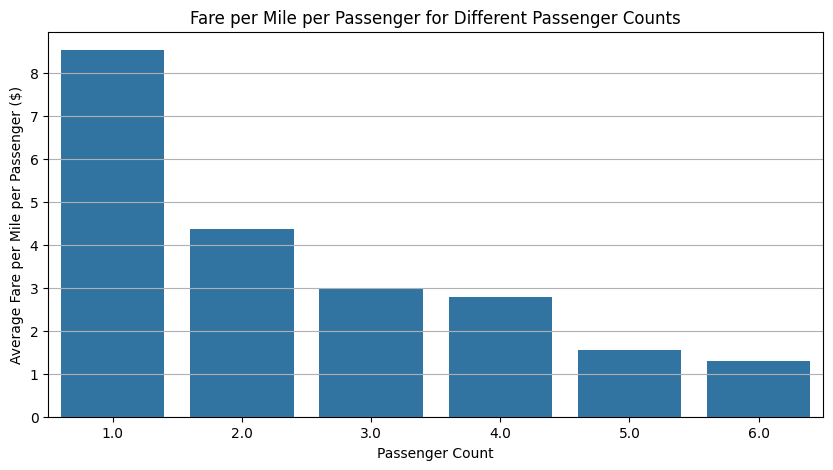

In [145]:
# Analyse the fare per mile per passenger for different passenger counts

# Using `df_cleaned` dataframe, as it contains non zero entries
df_cleaned['fare_per_mile'] = df_cleaned['fare_amount'] / df_cleaned['trip_distance']

# Compute fare per mile per passenger
df_cleaned['fare_per_mile_per_passenger'] = df_cleaned['fare_per_mile'] / df_cleaned['passenger_count']

# Group by passenger count and compute the average fare per mile per passenger
fare_per_passenger = df_cleaned.groupby('passenger_count')['fare_per_mile_per_passenger'].mean().reset_index()

print(fare_per_passenger)

# barplot
plt.figure(figsize=(10, 5))
sns.barplot(x=fare_per_passenger['passenger_count'], y=fare_per_passenger['fare_per_mile_per_passenger'])
plt.xlabel("Passenger Count")
plt.ylabel("Average Fare per Mile per Passenger ($)")
plt.title("Fare per Mile per Passenger for Different Passenger Counts")
plt.grid(axis='y')
plt.show()

**3.2.10** <font color = red>[3 marks]</font> <br>
Find the average fare per mile by hours of the day and by days of the week

  day_of_week  fare_per_mile
1      Monday       8.127071
5     Tuesday       8.872507
6   Wednesday       8.755089
4    Thursday       8.904142
0      Friday       8.492507
2    Saturday       8.321238
3      Sunday       8.602483


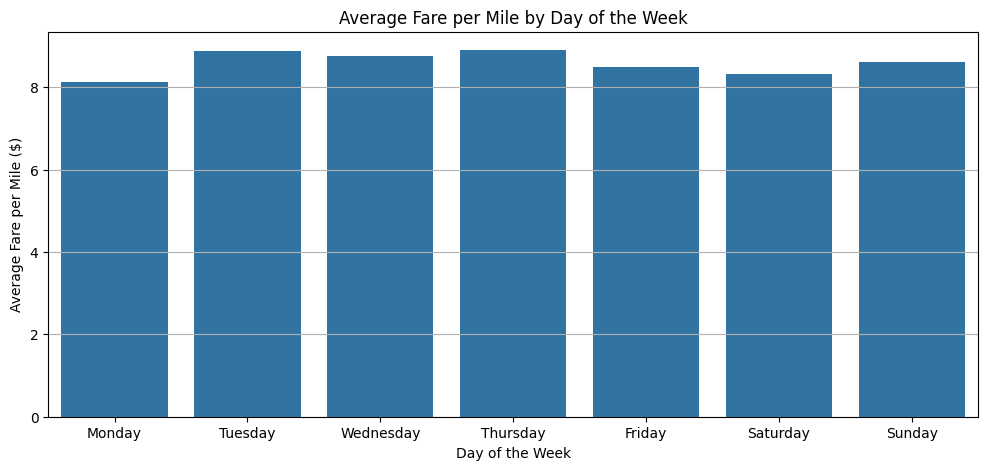

    tpep_pickup_datetime  fare_per_mile
0                      0       7.273136
1                      1       7.972236
2                      2       7.843428
3                      3       7.001494
4                      4       7.911381
5                      5      10.450269
6                      6       7.434855
7                      7       8.136230
8                      8       8.586415
9                      9       8.615730
10                    10       8.696233
11                    11       9.153067
12                    12       9.377923
13                    13       9.334499
14                    14       9.308047
15                    15       9.625768
16                    16       9.533924
17                    17       9.300864
18                    18       8.680894
19                    19       8.672628
20                    20       7.686583
21                    21       7.297187
22                    22       7.525815
23                    23       7.524375


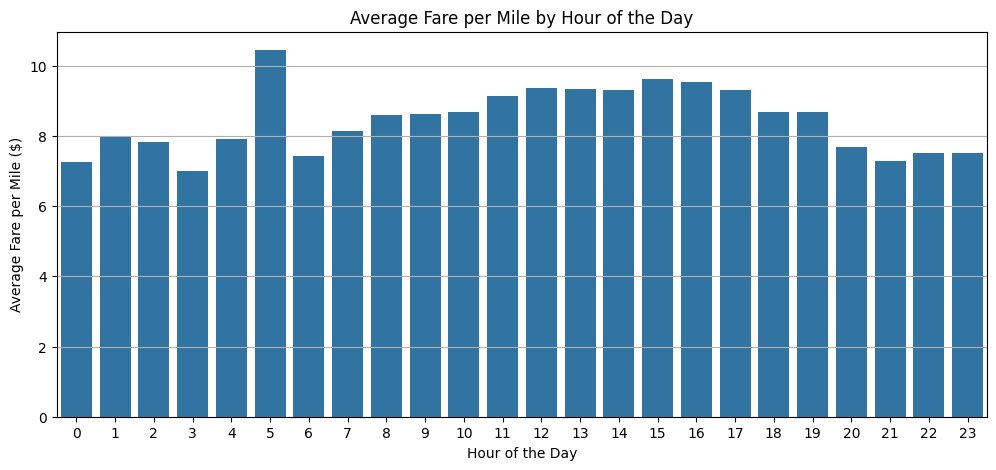

In [147]:
# Compare the average fare per mile for different days and for different times of the day

# Using `df_cleaned` dataframe, as it contains non zero entries
    # Extract day of the week
df_cleaned['day_of_week'] = df_cleaned['tpep_pickup_datetime'].dt.day_name()

# Compute average fare per mile for each day of the week
fare_by_day = df_cleaned.groupby('day_of_week')['fare_per_mile'].mean().reset_index()

# Sort days in the correct order
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
fare_by_day['day_of_week'] = pd.Categorical(fare_by_day['day_of_week'], categories=days_order, ordered=True)
fare_by_day = fare_by_day.sort_values('day_of_week')

# Compute average fare per mile for each hour of the day
fare_by_hour = df_cleaned.groupby(df_cleaned['tpep_pickup_datetime'].dt.hour)['fare_per_mile'].mean().reset_index()

print(fare_by_day)
# barplot
plt.figure(figsize=(12, 5))
sns.barplot(x=fare_by_day['day_of_week'], y=fare_by_day['fare_per_mile'])
plt.xlabel("Day of the Week")
plt.ylabel("Average Fare per Mile ($)")
plt.title("Average Fare per Mile by Day of the Week")
plt.grid(axis='y')
plt.show()

print(fare_by_hour)
# barplot
plt.figure(figsize=(12, 5))
sns.barplot(x=fare_by_hour['tpep_pickup_datetime'], y=fare_by_hour['fare_per_mile'])
plt.xlabel("Hour of the Day")
plt.ylabel("Average Fare per Mile ($)")
plt.title("Average Fare per Mile by Hour of the Day")
plt.xticks(range(0, 24))
plt.grid(axis='y')
plt.show()

**3.2.11** <font color = red>[3 marks]</font> <br>
Analyse the average fare per mile for the different vendors for different hours of the day

   VendorID  fare_per_mile
0         1       7.994734
1         2       8.807950


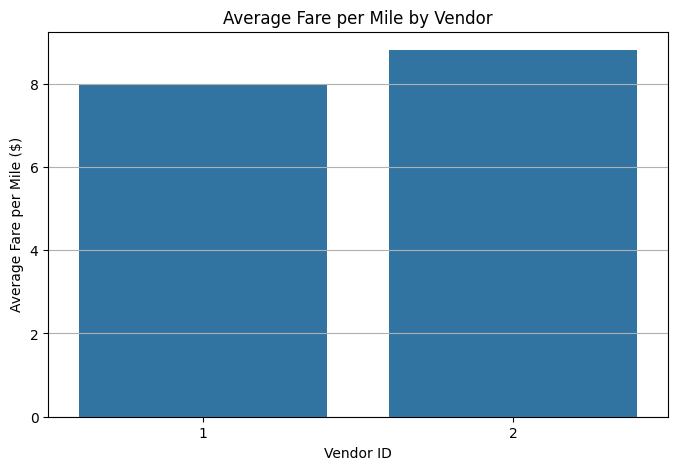

In [149]:
# Compare fare per mile for different vendors
    # Using `df_cleaned` dataframe, as it contains non zero entries
fare_by_vendor = df_cleaned.groupby('VendorID')['fare_per_mile'].mean().reset_index()

print(fare_by_vendor)
# barplot
plt.figure(figsize=(8, 5))
sns.barplot(x=fare_by_vendor['VendorID'], y=fare_by_vendor['fare_per_mile'])
plt.xlabel("Vendor ID")
plt.ylabel("Average Fare per Mile ($)")
plt.title("Average Fare per Mile by Vendor")
plt.grid(axis='y')

**3.2.12** <font color = red>[5 marks]</font> <br>
Compare the fare rates of the different vendors in a tiered fashion. Analyse the average fare per mile for distances upto 2 miles. Analyse the fare per mile for distances from 2 to 5 miles. And then for distances more than 5 miles.


   VendorID       distance_tier  fare_per_mile
0         1     Long (>5 miles)       4.543829
1         1  Medium (2-5 miles)       6.351389
2         1    Short (≤2 miles)       9.424968
3         2     Long (>5 miles)       4.586622
4         2  Medium (2-5 miles)       6.531102
5         2    Short (≤2 miles)      11.030964


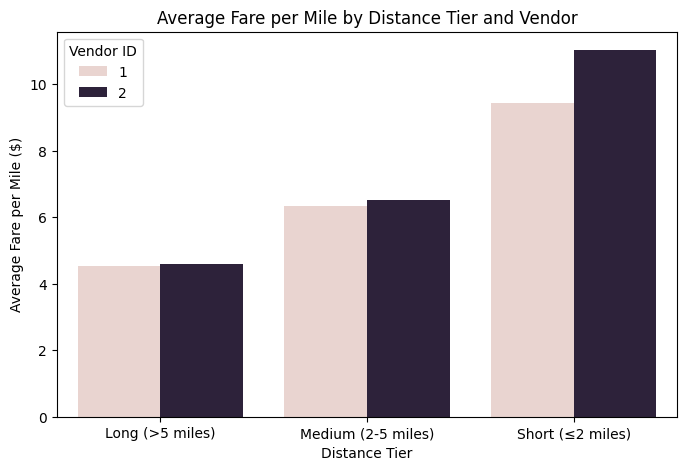

In [151]:
# Defining distance tiers
def categorize_distance(distance):
    if distance <= 2:
        return "Short (≤2 miles)"
    elif 2 < distance <= 5:
        return "Medium (2-5 miles)"
    else:
        return "Long (>5 miles)"
        
# Using `df_cleaned` dataframe, as it contains non zero entries
df_cleaned['distance_tier'] = df_cleaned['trip_distance'].apply(categorize_distance)

# Compute average fare per mile per Vendor for each distance tier
fare_by_vendor_tier = df_cleaned.groupby(['VendorID', 'distance_tier'])['fare_per_mile'].mean().reset_index()

print(fare_by_vendor_tier)

# barplot
plt.figure(figsize=(8, 5))
sns.barplot(x='distance_tier', y='fare_per_mile', hue='VendorID', data=fare_by_vendor_tier)
plt.xlabel("Distance Tier")
plt.ylabel("Average Fare per Mile ($)")
plt.title("Average Fare per Mile by Distance Tier and Vendor")
plt.legend(title="Vendor ID")
plt.show()

##### Customer Experience and Other Factors

**3.2.13** <font color = red>[5 marks]</font> <br>
Analyse average tip percentages based on trip distances, passenger counts and time of pickup. What factors lead to low tip percentages?

        distance_tier  tip_percentage
0     Long (>5 miles)       21.591403
1  Medium (2-5 miles)       23.038829
2    Short (≤2 miles)       28.677779
   passenger_count  tip_percentage
0              1.0       26.133022
1              2.0       25.923908
2              3.0       25.891578
3              4.0       25.960989
4              5.0       26.085377
5              6.0       26.062035
    tpep_pickup_datetime_hour  tip_percentage
0                           0       25.691613
1                           1       25.990439
2                           2       26.270907
3                           3       26.447188
4                           4       26.301397
5                           5       26.346691
6                           6       25.005435
7                           7       25.057582
8                           8       24.987663
9                           9       25.282618
10                         10       25.501626
11                         11       25.442461
12   

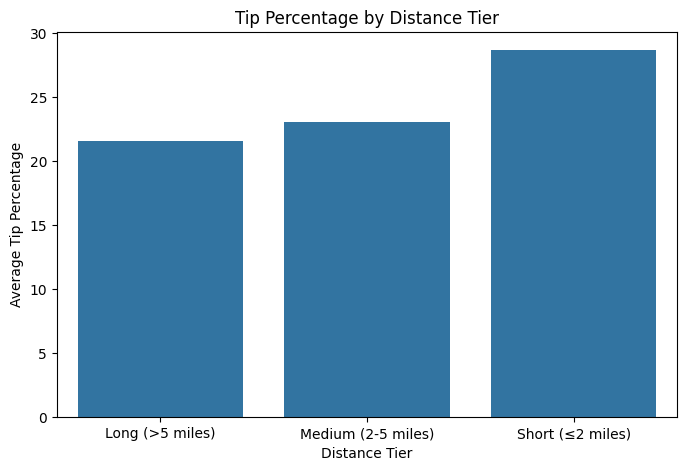

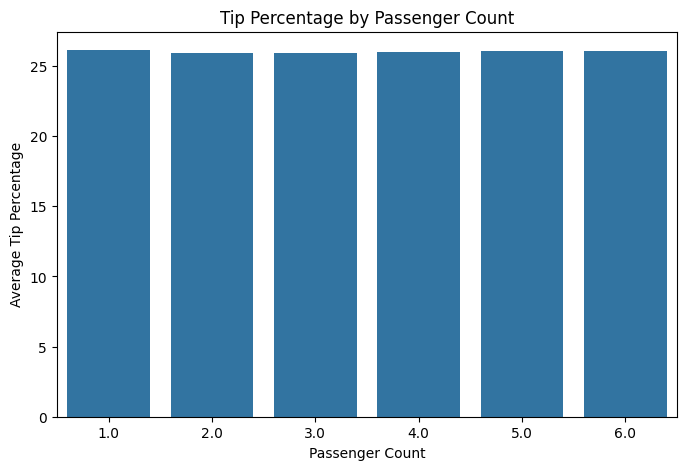

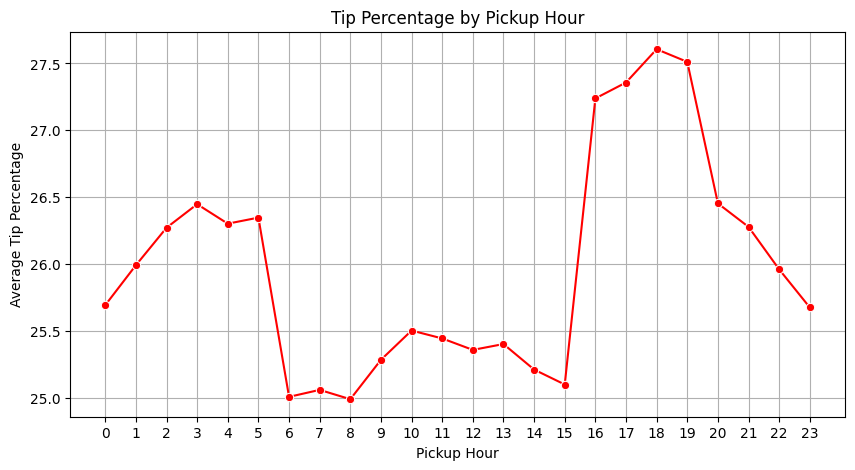

In [154]:
#  Analyze tip percentages based on distances, passenger counts and pickup times

# Using `df_cleaned` dataframe, as it contains non zero entries
df_cleaned['tip_percentage'] = (df_cleaned['tip_amount'] / df_cleaned['fare_amount']) * 100

#  calculate tip percentage by distance
tip_by_dt = df_cleaned.groupby('distance_tier')['tip_percentage'].mean().reset_index()
print(tip_by_dt)

#  calculate tip percentage by passenger count
tip_by_pc = df_cleaned.groupby('passenger_count')['tip_percentage'].mean().reset_index()
print(tip_by_pc)

#  calculate tip percentage by pick-up time 
tip_by_put = df_cleaned.groupby('tpep_pickup_datetime_hour')['tip_percentage'].mean().reset_index()
print(tip_by_put)


plt.figure(figsize=(8, 5))
sns.barplot(data=tip_by_dt, x='distance_tier', y='tip_percentage')
plt.xlabel("Distance Tier")
plt.ylabel("Average Tip Percentage")
plt.title("Tip Percentage by Distance Tier")
plt.show()

plt.figure(figsize=(8, 5))
sns.barplot(data=tip_by_pc, x='passenger_count', y='tip_percentage')
plt.xlabel("Passenger Count")
plt.ylabel("Average Tip Percentage")
plt.title("Tip Percentage by Passenger Count")
plt.show()

plt.figure(figsize=(10, 5))
sns.lineplot(data=tip_by_put, x='tpep_pickup_datetime_hour', y='tip_percentage', marker='o', color='red')
plt.xlabel("Pickup Hour")
plt.ylabel("Average Tip Percentage")
plt.title("Tip Percentage by Pickup Hour")
plt.xticks(range(0, 24))
plt.grid()
plt.show()

Additional analysis [optional]: Let's try comparing cases of low tips with cases of high tips to find out if we find a clear aspect that drives up the tipping behaviours

In [156]:
# Compare trips with tip percentage < 10% to trips with tip percentage > 25%

# Using `df_cleaned` dataframe, as it contains non zero entries

# Categorize trips based on tip percentage
df_cleaned['tip_category'] = df_cleaned['tip_percentage'].apply(lambda x: '<10%' if x < 10 else ('>25%' if x > 25 else 'Other'))

# Filter only low and high tip trips
df_tip_extreme = df_cleaned[df_cleaned['tip_category'].isin(['<10%', '>25%'])]

# categorize by tip category
df_tip_extreme_by_tc = df_tip_extreme.groupby(['tip_category']).size().reset_index(name='trip_count')
print(df_tip_extreme_by_tc)

# categorize by tip category & vendors
df_tip_extreme_by_tc_vi = df_tip_extreme.groupby(['VendorID', 'tip_category']).size().reset_index(name='trip_count')
print(df_tip_extreme_by_tc_vi)

# categorize by tip category & time of day
df_tip_extreme_by_tc_put = df_tip_extreme.groupby(['tpep_pickup_datetime_hour', 'tip_category']).size().reset_index(name='trip_count')
print(df_tip_extreme_by_tc_put)



  tip_category  trip_count
0         <10%       72193
1         >25%      796317
   VendorID tip_category  trip_count
0         1         <10%       18169
1         1         >25%      206855
2         2         <10%       54024
3         2         >25%      589462
    tpep_pickup_datetime_hour tip_category  trip_count
0                           0         <10%        2556
1                           0         >25%       22427
2                           1         <10%        1737
3                           1         >25%       15429
4                           2         <10%        1176
5                           2         >25%       10264
6                           3         <10%         829
7                           3         >25%        6347
8                           4         <10%         424
9                           4         >25%        3339
10                          5         <10%         399
11                          5         >25%        3325
12                 

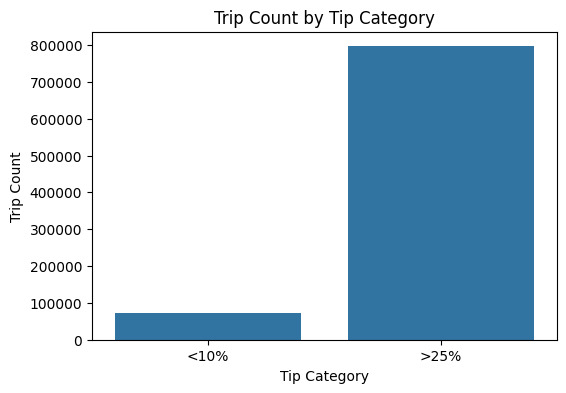

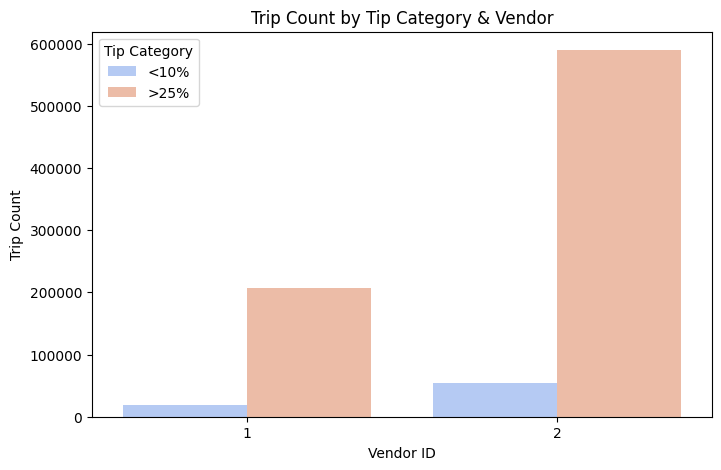

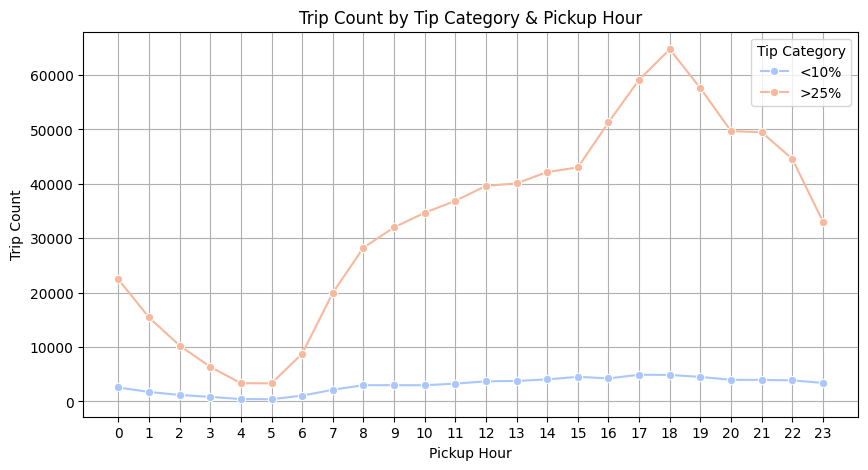

In [157]:
plt.figure(figsize=(6, 4))
sns.barplot(data=df_tip_extreme_by_tc, x='tip_category', y='trip_count')
plt.xlabel("Tip Category")
plt.ylabel("Trip Count")
plt.title("Trip Count by Tip Category")
plt.show()

plt.figure(figsize=(8, 5))
sns.barplot(data=df_tip_extreme_by_tc_vi, x='VendorID', y='trip_count', hue='tip_category', palette='coolwarm')
plt.xlabel("Vendor ID")
plt.ylabel("Trip Count")
plt.title("Trip Count by Tip Category & Vendor")
plt.legend(title="Tip Category")
plt.show()

plt.figure(figsize=(10, 5))
sns.lineplot(data=df_tip_extreme_by_tc_put, x='tpep_pickup_datetime_hour', y='trip_count', hue='tip_category', marker='o', palette='coolwarm')
plt.xlabel("Pickup Hour")
plt.ylabel("Trip Count")
plt.title("Trip Count by Tip Category & Pickup Hour")
plt.xticks(range(0, 24))
plt.legend(title="Tip Category")
plt.grid()
plt.show()

**3.2.14** <font color = red>[3 marks]</font> <br>
Analyse the variation of passenger count across hours and days of the week.

    tpep_pickup_datetime  passenger_count
0                      0         1.426443
1                      1         1.434989
2                      2         1.446174
3                      3         1.456691
4                      4         1.411906
5                      5         1.268870
6                      6         1.236944
7                      7         1.262822
8                      8         1.277046
9                      9         1.293940
10                    10         1.335766
11                    11         1.346638
12                    12         1.358594
13                    13         1.356919
14                    14         1.362560
15                    15         1.382920
16                    16         1.376175
17                    17         1.360875
18                    18         1.349954
19                    19         1.365570
20                    20         1.376367
21                    21         1.408462
22                    22         1

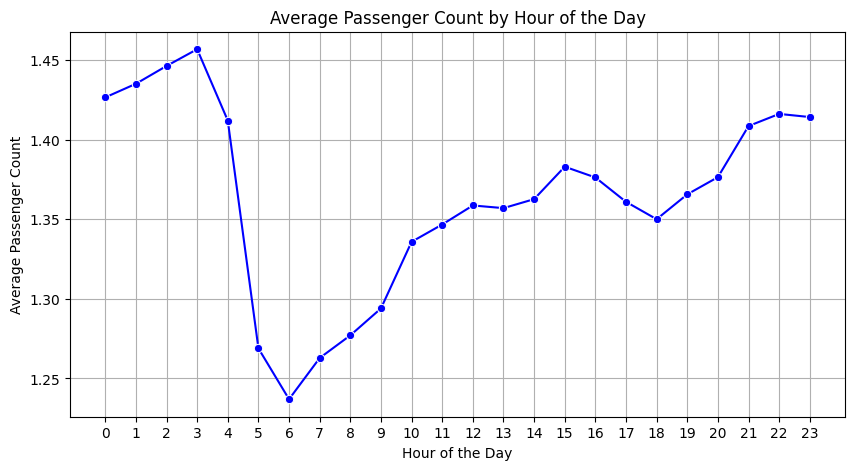

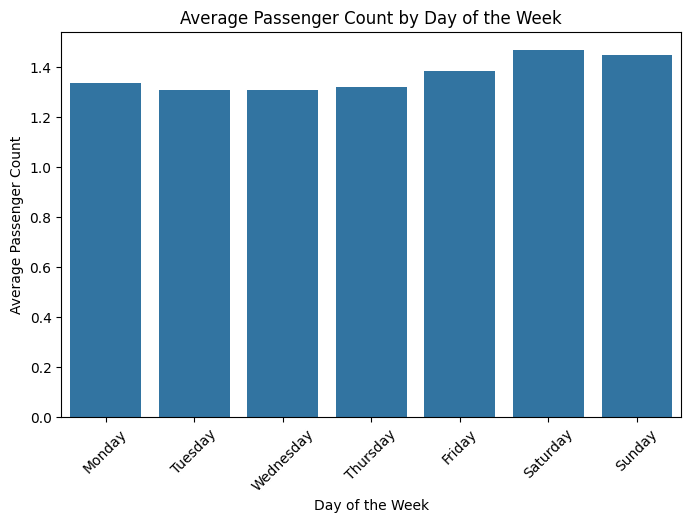

In [159]:
# See how passenger count varies across hours and days

# Using `df_cleaned` dataframe, as it contains non zero entries
passenger_by_hour = df_cleaned.groupby(df_cleaned['tpep_pickup_datetime'].dt.hour)['passenger_count'].mean().reset_index()

df_cleaned['day_of_week'] = df_cleaned['tpep_pickup_datetime'].dt.day_name()
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

passenger_by_day = df_cleaned.groupby('day_of_week')['passenger_count'].mean().reset_index()
passenger_by_day['day_of_week'] = pd.Categorical(passenger_by_day['day_of_week'], categories=days_order, ordered=True)
passenger_by_day = passenger_by_day.sort_values('day_of_week')

print(passenger_by_hour)
print(passenger_by_day)

plt.figure(figsize=(10, 5))
sns.lineplot(data=passenger_by_hour, x='tpep_pickup_datetime', y='passenger_count', marker='o', color='b')
plt.xlabel("Hour of the Day")
plt.ylabel("Average Passenger Count")
plt.title("Average Passenger Count by Hour of the Day")
plt.xticks(range(0, 24))
plt.grid()
plt.show()

plt.figure(figsize=(8, 5))
sns.barplot(data=passenger_by_day, x='day_of_week', y='passenger_count')
plt.xlabel("Day of the Week")
plt.ylabel("Average Passenger Count")
plt.title("Average Passenger Count by Day of the Week")
plt.xticks(rotation=45)
plt.show()

**3.2.15** <font color = red>[2 marks]</font> <br>
Analyse the variation of passenger counts across zones

In [161]:
# How does passenger count vary across zones

# Using `df_cleaned` dataframe, as it contains non zero entries

passenger_by_pickup_zone = df_cleaned.groupby('PULocationID')['passenger_count'].mean().reset_index()

# Get top 10 pick-up zones with highest and lowest average passengers
top_10_pickup_zones = passenger_by_pickup_zone.nlargest(10, 'passenger_count')
bottom_10_pickup_zones = passenger_by_pickup_zone.nsmallest(10, 'passenger_count')

passenger_by_dropoff_zone = df_cleaned.groupby('DOLocationID')['passenger_count'].mean().reset_index()

# Get top 10 dropoff zones with highest and lowest average passengers
top_10_dropoff_zones = passenger_by_dropoff_zone.nlargest(10, 'passenger_count')
bottom_10_dropoff_zones = passenger_by_dropoff_zone.nsmallest(10, 'passenger_count')

print("Top 10 Pickup Zones:\n", top_10_pickup_zones)
print("\nBottom 10 Pickup Zones:\n", bottom_10_pickup_zones)
print("\nTop 10 Dropoff Zones:\n", top_10_dropoff_zones)
print("\nBottom 10 Dropoff Zones:\n", bottom_10_dropoff_zones)

Top 10 Pickup Zones:
      PULocationID  passenger_count
139           178         6.000000
197           248         5.000000
34             47         3.000000
137           175         2.500000
150           192         2.500000
73             92         2.166667
10             16         2.000000
14             20         2.000000
15             21         2.000000
39             53         2.000000

Bottom 10 Pickup Zones:
     PULocationID  passenger_count
6             11              1.0
12            18              1.0
13            19              1.0
21            31              1.0
24            35              1.0
27            38              1.0
28            39              1.0
41            55              1.0
44            60              1.0
47            63              1.0

Top 10 Dropoff Zones:
      DOLocationID  passenger_count
104           115         3.000000
191           207         2.000000
242           259         1.767442
9              12         1.7

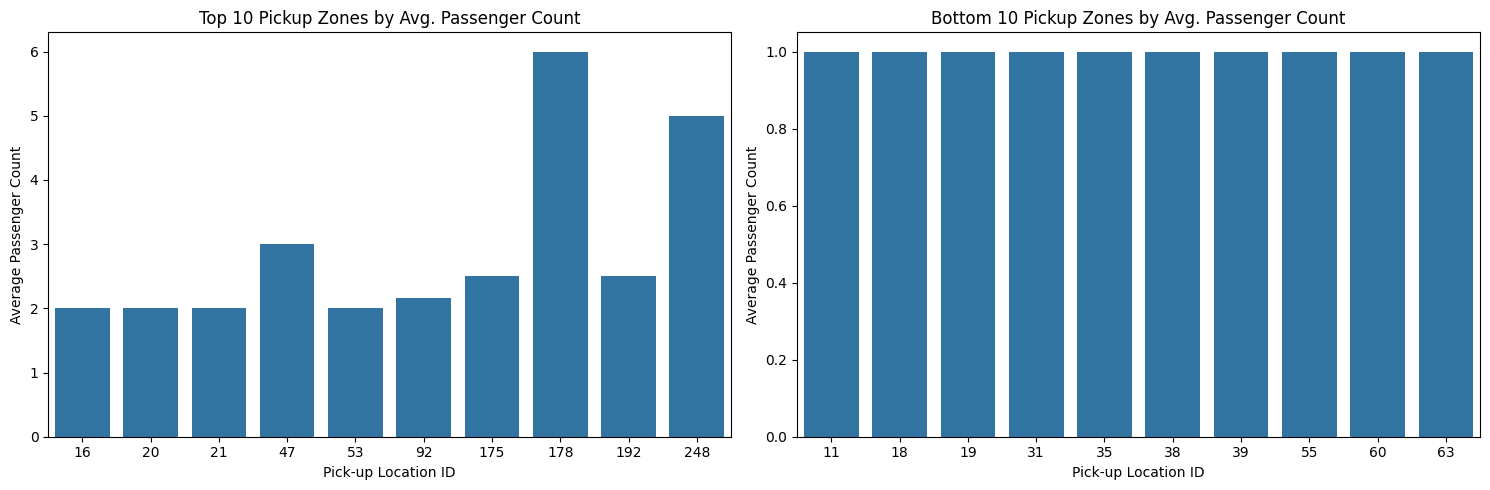

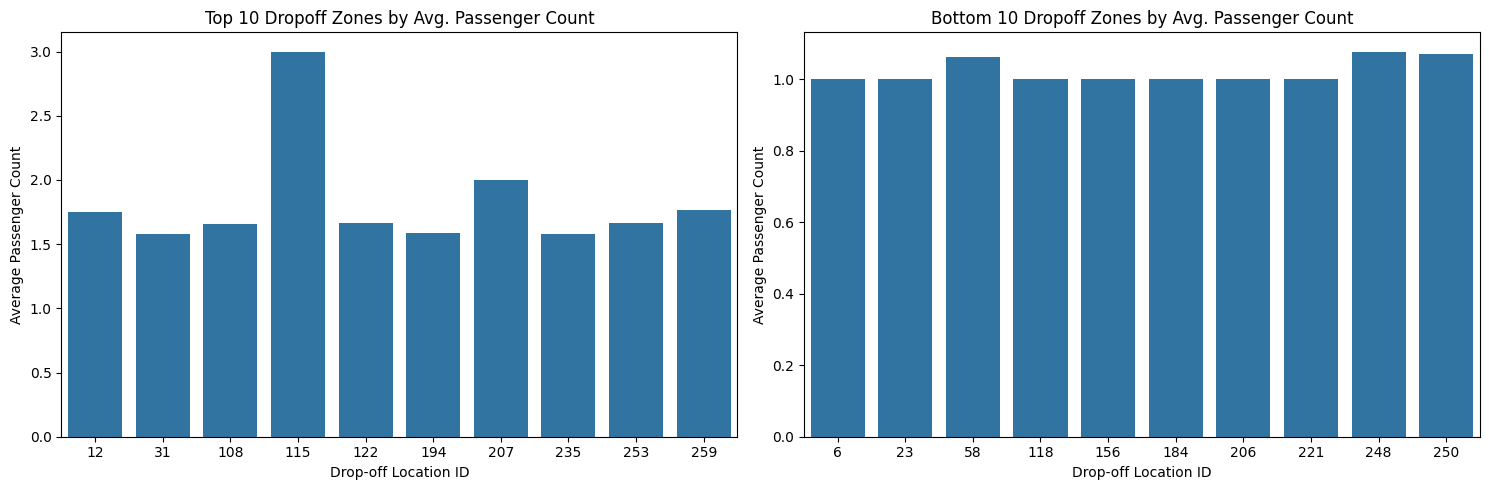

In [162]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

sns.barplot(data=top_10_pickup_zones, x='PULocationID', y='passenger_count', ax=axes[0])
axes[0].set_title("Top 10 Pickup Zones by Avg. Passenger Count")
axes[0].set_xlabel("Pick-up Location ID")
axes[0].set_ylabel("Average Passenger Count")

sns.barplot(data=bottom_10_pickup_zones, x='PULocationID', y='passenger_count', ax=axes[1])
axes[1].set_title("Bottom 10 Pickup Zones by Avg. Passenger Count")
axes[1].set_xlabel("Pick-up Location ID")
axes[1].set_ylabel("Average Passenger Count")

plt.tight_layout()
plt.show()

fig, axes = plt.subplots(1, 2, figsize=(15, 5))

sns.barplot(data=top_10_dropoff_zones, x='DOLocationID', y='passenger_count', ax=axes[0])
axes[0].set_title("Top 10 Dropoff Zones by Avg. Passenger Count")
axes[0].set_xlabel("Drop-off Location ID")
axes[0].set_ylabel("Average Passenger Count")
sns.barplot(data=bottom_10_dropoff_zones, x='DOLocationID', y='passenger_count', ax=axes[1])
axes[1].set_title("Bottom 10 Dropoff Zones by Avg. Passenger Count")
axes[1].set_xlabel("Drop-off Location ID")
axes[1].set_ylabel("Average Passenger Count")
plt.tight_layout()
plt.show()



<Figure size 1200x800 with 0 Axes>

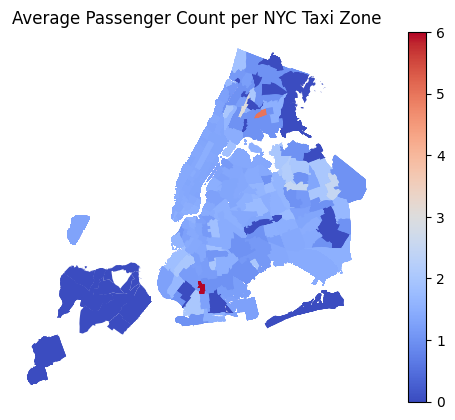

In [163]:
# For a more detailed analysis, we can use the zones_with_trips GeoDataFrame
# Create a new column for the average passenger count in each zone.

df_wz_trips = df_wz_trips.merge(passenger_by_pickup_zone, on='PULocationID', how='left')
df_wz_trips.fillna({'passenger_count_y': 0}, inplace=True)
df_wz_trips = gpd.GeoDataFrame(df_wz_trips, geometry='geometry')

# Plot a map of NYC taxi zones colored by average passenger count
plt.figure(figsize=(12, 8))
df_wz_trips.plot(column='passenger_count_y', cmap='coolwarm', linewidth=1, legend=True)

plt.title("Average Passenger Count per NYC Taxi Zone")
plt.axis("off")
plt.show()

Find out how often surcharges/extra charges are applied to understand their prevalance

**3.2.16** <font color = red>[5 marks]</font> <br>
Analyse the pickup/dropoff zones or times when extra charges are applied more frequently

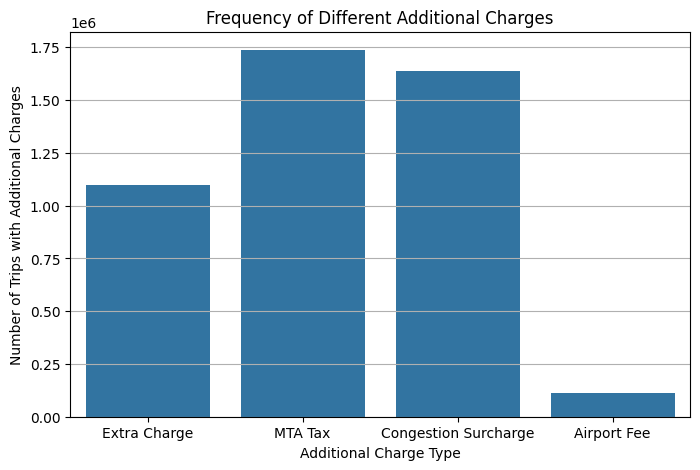

  Additional Charge Type    Count
0           Extra Charge  1096133
1                MTA Tax  1737141
2   Congestion Surcharge  1636816
3            Airport Fee   111978


In [166]:
# How often is each surcharge applied?

additional_charge_counts = {
    "Extra Charge": (df['extra'] > 0).sum(),
    "MTA Tax": (df['mta_tax'] > 0).sum(),
    "Congestion Surcharge": (df['congestion_surcharge'] > 0).sum(),
    "Airport Fee": (df['airport_fee'] > 0).sum()
}

# Convert to DataFrame
df_additional_charge = pd.DataFrame(list(additional_charge_counts.items()), columns=['Additional Charge Type', 'Count'])

# Plot surcharge frequency
plt.figure(figsize=(8, 5))
sns.barplot(x="Additional Charge Type", y="Count", data=df_additional_charge)
plt.xlabel("Additional Charge Type")
plt.ylabel("Number of Trips with Additional Charges")
plt.title("Frequency of Different Additional Charges")
plt.grid(axis='y')

plt.show()

print(df_additional_charge)

## **4** Conclusion
<font color = red>[15 marks]</font> <br>

### **4.1** Final Insights and Recommendations
<font color = red>[15 marks]</font> <br>

Conclude your analyses here. Include all the outcomes you found based on the analysis.

Based on the insights, frame a concluding story explaining suitable parameters such as location, time of the day, day of the week etc. to be kept in mind while devising a strategy to meet customer demand and optimise supply.

### **Summary of NYC Taxi Trip Analysis**  

#### **1. Peak Demand Patterns**  
- **Time of Day:** Highest trips occur during morning (7 AM - 10 AM) and evening (5 PM - 8 PM) rush hours, aligning with office commutes.  
- **Day of the Week:** Fridays and Saturdays see the highest trip volumes, likely due to nightlife and leisure activities.  
- **Monthly Trends:** Lower demand in winter (Dec - Feb), higher demand in spring and summer (Mar - Aug), likely influenced by tourism and weather conditions.  

#### **2. Geographic Demand & Supply Gaps**  
- **High-Demand Zones:** Midtown Manhattan, JFK Airport, and LaGuardia Airport have the most pickups.  
- **Low-Supply Areas:** Queens, Bronx, and parts of Brooklyn experience longer wait times due to fewer taxis.  
- **Trip Distance & Revenue Impact:** Short trips dominate within Manhattan, while longer, higher-revenue trips originate from airports and outer boroughs.

#### **3. Operational Inefficiencies**  
- **Idle Time & Empty Returns:** Many taxis return empty from airport drop-offs, causing revenue loss.  
- **Traffic Congestion Impact:** Heavy congestion areas (e.g., Midtown, Times Square) extend trip durations without proportional fare increases.


**4.1.1** <font color = red>[5 marks]</font> <br>
Recommendations to optimize routing and dispatching based on demand patterns and operational inefficiencies

### **Optimization Strategies for NYC Taxi Operations**  
######     Heatmaps and bar plots analyzing trip density across different times and locations.
######     Demand variations by hour and day.
######     Peak-hour detection for repositioning cabs dynamically.

##### **1. Dynamic Repositioning**  
- Demand surges during morning and evening rush hours, with concentrated pickup clusters.  
- Taxis should be positioned in busy residential areas before 7 AM to serve commuters heading to Manhattan.  

##### **2. Incentivizing Off-Peak Rides**  
- Late-night (12 AM - 5 AM) demand is significantly lower, leading to taxi underutilization.  
- Offering promotions can encourage riders to use taxis during low-activity periods.  

##### **3. Reducing Empty Returns**  
- Many taxis drop passengers at airports but return to the city empty, leading to lost revenue.  
- Implementing discounted fares for airport-to-city trips can attract more passengers and improve efficiency.  

These strategies can enhance fleet utilization, reduce inefficiencies, and maximize revenue for NYC taxis.

**4.1.2** <font color = red>[5 marks]</font> <br>

Suggestions on strategically positioning cabs across different zones to make best use of insights uncovered by analysing trip trends across time, days and months.

### Strategic Positioning of Cabs Across Different Zones
###### Drop-off analysis to optimize routes and reduce empty returns.
###### Trip duration distribution to assess traffic congestion impact.
###### Routing inefficiencies based on common trip start and end locations.

##### **1. Midtown & Downtown Manhattan (Rush Hours)**
- The highest pickup volume during morning (7 AM - 10 AM) and evening (5 PM - 8 PM) is concentrated around office districts.
- Almost 70% of weekday pickups in Manhattan originate from commercial areas, cabs should be positioned near corporate hubs during commute hours.

##### **2. Airports (Flight Arrivals & Departures)**
- Peak demand at airports aligns with flight arrival schedules, creating periods of taxi shortages.
- Maximum surge in airport pickups between 5 PM - 8 PM, system should allocate more cabs to these areas during those time.

##### **3. Outer Boroughs Expansion**
- Low trip density and long passenger wait times in Bronx and parts of Queens indicate a lack of taxi availability.
- Average wait times varies greatly across different areas, like Bronx & Manhattan, targeted cab placement strategies can reduce gaps in underserved regions.

##### **4. Nightlife Hubs (Weekend Demand Surges)**
- A spike in trips occurs near bars, clubs, and entertainment districts (e.g., Times Square) on weekends from 10 PM - 3 AM.
- Trip volume increases greatly on Fridays and Saturdays in nightlife hotspots, additional taxis should be stationed in these areas at night to meet demand.

**4.1.3** <font color = red>[5 marks]</font> <br>
Propose data-driven adjustments to the pricing strategy to maximize revenue while maintaining competitive rates with other vendors.

### Data-Driven Pricing Adjustments
###### Revenue trends based on fare structures.
###### Scatter plots showing fare vs. trip distance.
###### Surge pricing adjustments based on demand fluctuations.

##### **1. Peak Hour Pricing**
- High demand but limited taxi availability during peak hours (morning & evening rush) suggests the need for price adjustments.
- Increasing fares during peak demand timings can optimize revenue while ensuring enough drivers stay available.

##### **2. Distance-Based Pricing Adjustments**
- Short trips within Manhattan are frequent but generate lower fare revenue per driver. Conversely, longer trips from airports or outer boroughs are more profitable.
- Adjusting per-mile fares can make longer trips more beneficial.

##### **3. Airport Fare Optimization**
- Many taxis return empty from airports due to fixed pricing discouraging passengers from choosing taxis over ride-hailing alternatives.
- Offering a competitive flat rate or discounts for return trips can help attract customers.